<a href="https://colab.research.google.com/github/Bertha-ding/20MA573-yuning-ding/blob/master/PRO/PRJT1FINISHED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOW WE WORK ON 1.a

In [0]:
!pip install yahoo-finance
!pip install pandas_market_calendars

import pandas as pd
import pandas_market_calendars as pmc
import pandas_datareader.data as drd
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr

In [0]:
AAPL= drd.get_data_yahoo('AAPL','01/01/2012','12/31/2019',interval='d')
TSLA= drd.get_data_yahoo('TSLA','01/01/2012','12/31/2019',interval='d')
GILD= drd.get_data_yahoo('GILD','01/01/2012','12/31/2019',interval='d')
MELI= drd.get_data_yahoo('MELI','01/01/2012','12/31/2019',interval='d')
MSFT= drd.get_data_yahoo('MSFT','01/01/2012','12/31/2019',interval='d')
DIS= drd.get_data_yahoo('DIS','01/01/2012','12/31/2019',interval='d')
NVDA= drd.get_data_yahoo('NVDA','01/01/2012','12/31/2019',interval='d')
TCO= drd.get_data_yahoo('TCO','01/01/2012','12/31/2019',interval='d')
MMM= drd.get_data_yahoo('MMM','01/01/2012','12/31/2019',interval='d')
INCY= drd.get_data_yahoo('INCY','01/01/2012','12/31/2019',interval='d')
IBM= drd.get_data_yahoo('IBM','01/01/2012','12/31/2019',interval='d')
EPC= drd.get_data_yahoo('EPC','01/01/2012','12/31/2019',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','12/31/2019',interval='d')
YELP= drd.get_data_yahoo('VEA','01/01/2012','12/31/2019',interval='d')
VTI= drd.get_data_yahoo('VTI','01/01/2012','12/31/2019',interval='d')
yelp_1= drd.get_data_yahoo('YELP','01/01/2012','12/31/2019',interval='d')

In [0]:
AAPL

High         Low  ...      Volume   Adj Close
Date                                ...                        
2012-01-03   58.928570   58.428570  ...  75555200.0   50.994907
2012-01-04   59.240002   58.468571  ...  65005500.0   51.268970
2012-01-05   59.792858   58.952858  ...  67817400.0   51.838169
2012-01-06   60.392857   59.888573  ...  79573200.0   52.380054
2012-01-09   61.107143   60.192856  ...  98506100.0   52.296970
...                ...         ...  ...         ...         ...
2019-12-24  284.890015  282.920013  ...  12119700.0  283.596924
2019-12-26  289.980011  284.700012  ...  23280300.0  289.223602
2019-12-27  293.970001  288.119995  ...  36566500.0  289.113831
2019-12-30  292.690002  285.220001  ...  36028600.0  290.829773
2019-12-31  293.679993  289.519989  ...  25201400.0  292.954712

[2012 rows x 6 columns]

In [0]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
tradingdays = nyse.schedule(start_date='2012-01-01', end_date='2019-12-31')
nan_date=tradingdays.index[:41]
nan_date

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17', '2012-01-18', '2012-01-19',
               '2012-01-20', '2012-01-23', '2012-01-24', '2012-01-25',
               '2012-01-26', '2012-01-27', '2012-01-30', '2012-01-31',
               '2012-02-01', '2012-02-02', '2012-02-03', '2012-02-06',
               '2012-02-07', '2012-02-08', '2012-02-09', '2012-02-10',
               '2012-02-13', '2012-02-14', '2012-02-15', '2012-02-16',
               '2012-02-17', '2012-02-21', '2012-02-22', '2012-02-23',
               '2012-02-24', '2012-02-27', '2012-02-28', '2012-02-29',
               '2012-03-01'],
              dtype='datetime64[ns]', freq='C')

In [0]:
ADD= pd.DataFrame(columns=['High','Low','Open','Close','Volume','Adj Close'],index=nan_date)
tickers=['SPY','YELP']
port = pdr.get_data_yahoo(tickers, start="2012-01-01", end="2019-12-31")['Adj Close']
log_port=np.log(port)
log_port[:45]

for i in range(41):
  time_win=log_port.iloc[41-i:1047-i]['YELP']
  log_return=[]
  for j in range(1005):
    log_return.append(time_win[j+1]-time_win[j])
  u=np.mean(log_return)
  var=np.var(log_return)
  a=np.random.normal(u,var,1)
  log_port.iloc[40-i]['YELP']=log_port.iloc[41-i]['YELP']-a
yelp_update=np.exp(log_port)

for i in range(41):
  ADD.iloc[i]['Adj Close']=yelp_update.iloc[i]['YELP']

for i in range(1971):
  YELP.iloc[i+41]['Adj Close']=yelp_1.iloc[i]['Adj Close'].item()
for i in range(41):
  YELP.iloc[i]['Adj Close']=ADD.iloc[i]['Adj Close'].item()

YELP

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2012-01-03  31.570000  31.250000  31.260000  31.450001   8276700.0  24.796314
2012-01-04  31.350000  31.070000  31.290001  31.270000   2609200.0  24.763954
2012-01-05  30.850000  30.590000  30.770000  30.820000   2095900.0  24.783959
2012-01-06  30.730000  30.330000  30.730000  30.459999   2044000.0  24.820656
2012-01-09  30.620001  30.320000  30.610001  30.530001   1652200.0  24.859499
...               ...        ...        ...        ...         ...        ...
2019-12-24  43.849998  43.740002  43.849998  43.820000   4369000.0  34.060001
2019-12-26  44.020000  43.840000  43.900002  44.020000   5075400.0  34.660000
2019-12-27  44.250000  44.060001  44.240002  44.139999   7340400.0  34.849998
2019-12-30  44.189999  43.810001  44.189999  43.820000  10412900.0  34.580002
2019-12-31  44.060001  43.770000  43.869999  44.060001   6629100.0  34.830002

[2012 rows x 6 columns]

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
log_return=[]
for i in range(15):
  stock_log=np.log(stock_list[i]['Adj Close'])
  len_num=len(stock_log)
  for j in range(len_num-1):
    stock_log[j]=stock_log[j+1]-stock_log[j]
  log_return.append(stock_log)


In [0]:
log_return[0]


Date
2012-01-03    0.005360
2012-01-04    0.011041
2012-01-05    0.010399
2012-01-06   -0.001587
2012-01-09    0.003574
                ...   
2019-12-24    0.019646
2019-12-26   -0.000380
2019-12-27    0.005918
2019-12-30    0.007280
2019-12-31    5.680018
Name: Adj Close, Length: 2012, dtype: float64

# Now we work on 1.2

In [0]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
tradingdays = nyse.schedule(start_date='2012-01-01', end_date='2019-12-31')
tradingdays

market_open              market_close
2012-01-03 2012-01-03 14:30:00+00:00 2012-01-03 21:00:00+00:00
2012-01-04 2012-01-04 14:30:00+00:00 2012-01-04 21:00:00+00:00
2012-01-05 2012-01-05 14:30:00+00:00 2012-01-05 21:00:00+00:00
2012-01-06 2012-01-06 14:30:00+00:00 2012-01-06 21:00:00+00:00
2012-01-09 2012-01-09 14:30:00+00:00 2012-01-09 21:00:00+00:00
...                              ...                       ...
2019-12-24 2019-12-24 14:30:00+00:00 2019-12-24 18:00:00+00:00
2019-12-26 2019-12-26 14:30:00+00:00 2019-12-26 21:00:00+00:00
2019-12-27 2019-12-27 14:30:00+00:00 2019-12-27 21:00:00+00:00
2019-12-30 2019-12-30 14:30:00+00:00 2019-12-30 21:00:00+00:00
2019-12-31 2019-12-31 14:30:00+00:00 2019-12-31 21:00:00+00:00

[2012 rows x 2 columns]

In [0]:
from datetime import date
total_num=len(tradingdays)
date_list=[]
for i in range(total_num-1):
  if tradingdays.index[i].day > tradingdays.index[i+1].day:
    date_list.append(tradingdays.index[i])
date_list.append(tradingdays.index[2011])

#date_list 每个月最后一个交易日列表

In [0]:
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
#my_port portfolio模型

In [0]:
update_list=[] #所有天的portfolio

for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc['2012-01-03']['Adj Close']
update_list.append(my_port)

for j in range(len(date_list)):
  b=date_list[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  update_list.append(my_port)

#更新所有portfolio adjclose这一列

In [0]:
for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a]['Share']=(400000/15)/update_list[0].loc[a]['Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a]['Share']*portfolio2.loc[a]['Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a]['Share']=(to_value/15)/update_list[i+1].loc[a]['Adj Close']

#更新所有portfolio share这一列
#update——list 包含所有的portfolio zaiyuemojiaoyiri
update_list[0]

Share Adj Close
AAPL  522.928   50.9949
TSLA  949.668     28.08
GILD  1468.02    18.165
MELI  334.946   79.6148
MSFT  1210.98   22.0208
DIS    777.44   34.3006
NVDA  2063.64   12.9221
TCO   585.019   45.5826
MMM   396.717   67.2184
INCY  1778.96     14.99
IBM   190.566   139.934
EPC   480.248   55.5269
SPY   246.829   108.037
YELP  1075.43   24.7963
VTI   480.036   55.5514

# Now we work on 1.3

In [0]:
time_window=tradingdays.index
time_window

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=2012, freq='C')

In [0]:
date_list[:6]
def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a]['Share']*portfolio2.loc[a]['Adj Close']
  return res

# portfolio value

In [0]:
allstock_list=[]
for j in range(len(time_window)):
  b=time_window[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  allstock_list.append(my_port)

#zaisuoyoujiaoyiri portfolio data only adjclose


In [0]:
j=0
value_series=[]
for i in range(len(time_window)):
  if time_window[i] < date_list[j]:
    a=total_value(update_list[j],allstock_list[i])
    value_series.append(a)
  else:
    j+=1
    a=total_value(update_list[j],allstock_list[i])
    value_series.append(a)

#value_series Vt

In [0]:
logvalue_series=np.log(np.array(value_series))
logret_series=[]
for i in range(len(logvalue_series)-1):
  logret_series.append(logvalue_series[i+1]-logvalue_series[i])
  
#logret_series Log return

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


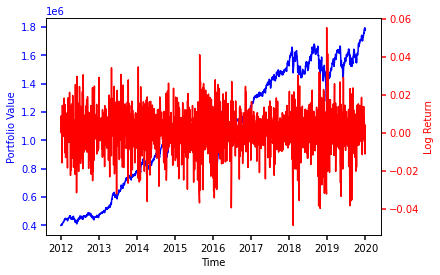

In [0]:
import matplotlib.pyplot as plt

logret_series.insert(0,0) 

fig,left_axis=plt.subplots()
right_axis = left_axis.twinx()
p1, = left_axis.plot(time_window, value_series,'b')
p2, = right_axis.plot(time_window,logret_series,'r')

left_axis.set_xlabel('Time')
left_axis.set_ylabel('Portfolio Value')
right_axis.set_ylabel('Log Return')


left_axis.yaxis.label.set_color(p1.get_color())
right_axis.yaxis.label.set_color(p2.get_color())

tkw = dict(size=5, width=1.5)
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)
left_axis.tick_params(axis='x', **tkw)

plt.show()

In [0]:
'''
my_port=new_portfolio()
for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc['2014-05-28']['Adj Close']
my_port
'''

"\nmy_port=new_portfolio()\nfor i in range(len(index_list)):\n    a=index_list[i]\n    my_port.loc[a]['Adj Close']=stock_list[i].loc['2014-05-28']['Adj Close']\nmy_port\n"

# Now we work on 2.1

In [0]:
four_year1=[]
for i in time_window:
  if i.year < 2016:
    four_year1.append(i)
#four_year1
len(four_year1)

# first four years timestamp

1006

In [0]:
u=[]
for i in range(15):
  a=log_return[i][:1005]
  u.append(a.mean())
u

#mu

[0.000651307449392186,
 0.0021349482485699574,
 0.0015797717851378486,
 0.00035364876830305727,
 0.0008361326272778298,
 0.00105605906408247,
 0.00091106047752495,
 0.00031750836162060606,
 0.000685530844762954,
 0.001969060609241371,
 -0.00020214014350277264,
 0.00034285946574331256,
 0.0005483261772205701,
 0.00014893565823690226,
 0.0005458413382885153]

In [0]:
df_temp={}

for i in range(15):
  df_temp[index_list[i]]=log_return[i][:1005]
df = pd.DataFrame(df_temp)
cov_mat=df.cov()  
cov_mat

#covariance matrix

AAPL      TSLA      GILD  ...       SPY      YELP       VTI
AAPL  0.000285  0.000103  0.000061  ...  0.000065  0.000101  0.000066
TSLA  0.000103  0.001102  0.000140  ...  0.000092  0.000288  0.000098
GILD  0.000061  0.000140  0.000384  ...  0.000076  0.000176  0.000078
MELI  0.000087  0.000219  0.000116  ...  0.000095  0.000269  0.000100
MSFT  0.000072  0.000098  0.000068  ...  0.000070  0.000080  0.000070
DIS   0.000056  0.000095  0.000076  ...  0.000065  0.000113  0.000066
NVDA  0.000082  0.000121  0.000079  ...  0.000076  0.000146  0.000078
TCO   0.000042  0.000055  0.000051  ...  0.000045  0.000073  0.000046
MMM   0.000055  0.000082  0.000067  ...  0.000060  0.000087  0.000060
INCY  0.000082  0.000207  0.000220  ...  0.000099  0.000234  0.000106
IBM   0.000058  0.000072  0.000050  ...  0.000056  0.000080  0.000056
EPC   0.000051  0.000090  0.000071  ...  0.000055  0.000097  0.000056
SPY   0.000065  0.000092  0.000076  ...  0.000064  0.000094  0.000065
YELP  0.000101  0.000288  0.000176  ...  0.000094  0.001610  0.000101
VTI   0.000066  0.000098  0.000078  ...  0.000065  0.000101  0.000066

[15 rows x 15 columns]

# NOW WE WORK ON 2.B

In [0]:
from scipy.stats import multivariate_normal

loss_appx=np.zeros(5000)
linloss_appx=np.zeros(5000)
loss=0
linloss=0
for i in range(5000):
  loss=0
  linloss=0
  var = np.random.multivariate_normal(mean=u, cov=cov_mat)
  for j in range(len(index_list)):
    a=index_list[j]
    linloss+=update_list[-1].loc[a]['Share']*update_list[-1].loc[a]['Adj Close']*var[j]
    loss+=update_list[-1].loc[a]['Share']*update_list[-1].loc[a]['Adj Close']*(np.exp(var[j])-1)
  linloss_appx[i]=-linloss
  loss_appx[i]=-loss

#linloss_appx
#loss_appx
#2019.12月31日的lamda&St 2020.1

In [0]:
def pdf_function(loss,title):
  a=pd.Series(loss)
  a.plot(kind='kde')
  plt.title(title)

In [0]:
import seaborn as sns 
def pdf_function1(loss,title):
  sns.distplot(loss,color="black",bins=50,kde=True)
  plt.title(title)
  plt.show()

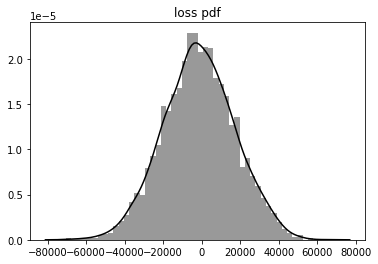

In [0]:
pdf_function1(loss_appx,'loss pdf')

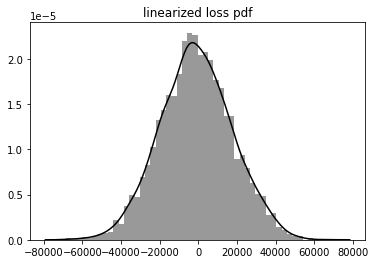

In [0]:
pdf_function1(linloss_appx,'linearized loss pdf')

In [0]:
def cdf_function(loss,title_name):
  ser = pd.Series(loss)
  ser = ser.sort_values()
  ser[len(ser)] = ser.iloc[-1]
  cum_dist = np.linspace(0.,1.,len(ser))
  ser_cdf = pd.Series(cum_dist, index=ser)
  ser_cdf.plot(drawstyle='steps',title=title_name)

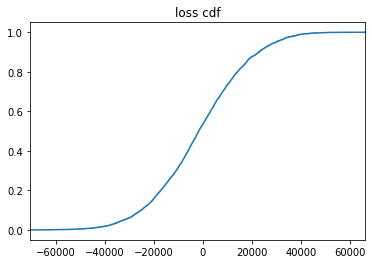

In [0]:
cdf_function(loss_appx,'loss cdf')

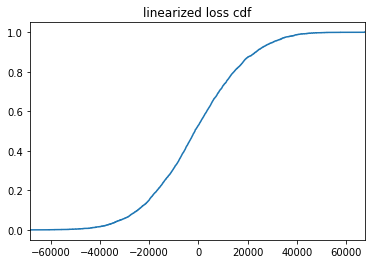

In [0]:
cdf_function(linloss_appx,'linearized loss cdf')

# NOW WE WORK ON 2.C

In [0]:
loss_series=[]
for i in range(len(value_series)-1):
  loss_series.append(value_series[i]-value_series[i+1])
four_year_loss=loss_series[:1005]

In [0]:
from scipy import stats
para_t=stats.t.fit(four_year_loss)
para_t
# use first four year to compute parameters

(3.960687775243446, -866.299822187882, 5983.310226732796)

In [0]:
loss_t_list=np.zeros(5000)
for i in range(5000):
  loss_t_list[i]=stats.t.rvs(loc = para_t[1], df = para_t[0], scale = para_t[2])

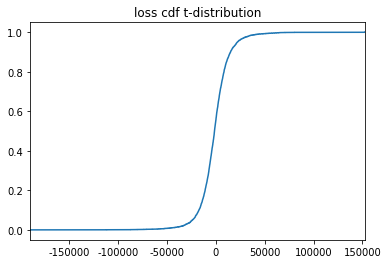

In [0]:
cdf_function(loss_t_list,'loss cdf t-distribution')

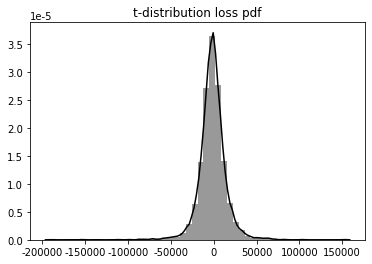

In [0]:
pdf_function1(loss_t_list,'t-distribution loss pdf')

# Now we work on 3.a

In [0]:
len(time_window)-len(four_year1)

1006

In [0]:
four_year2=time_window[-1006:]
four_year2

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=1006, freq='C')

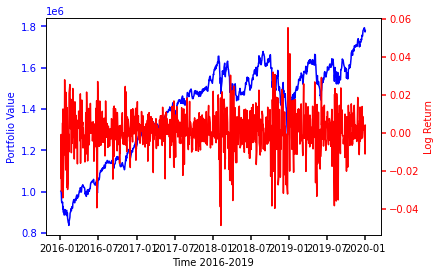

In [0]:
fig,left_axis=plt.subplots()
right_axis = left_axis.twinx()
p1, = left_axis.plot(time_window[-1006:], value_series[-1006:],'b')
p2, = right_axis.plot(time_window[-1006:],logret_series[-1006:],'r')

left_axis.set_xlabel('Time 2016-2019')
left_axis.set_ylabel('Portfolio Value')
right_axis.set_ylabel('Log Return')


left_axis.yaxis.label.set_color(p1.get_color())
right_axis.yaxis.label.set_color(p2.get_color())

tkw = dict(size=5, width=1.5)
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)
left_axis.tick_params(axis='x', **tkw)

plt.show()

# Now we work on 3.b

In [0]:
total_num=len(tradingdays)
date_list1=[]
for i in range(total_num-1):
  if tradingdays.index[i].day > tradingdays.index[i+1].day and tradingdays.index[i].year > 2015:
    date_list1.append(tradingdays.index[i])
date_list1.append(tradingdays.index[2011])
#four year last trading day
a=tradingdays.index.tolist()
index_for_ul=[]
for i in date_list1:
  b=a.index(i)
  index_for_ul.append(b)
index_for_ul
#last trading day index
last_four_year_loss=[]
for i in index_for_ul:
  a=loss_series[i-1]
  last_four_year_loss.append(a)
last_four_year_loss
#last_four year loss list

[-18932.872407351155,
 337.84750267281197,
 -4157.227257374092,
 10830.426872129552,
 -3325.8961494390387,
 -17291.827916624607,
 -8541.938251639018,
 -1165.0147086393554,
 -12216.247450947296,
 88.04996879398823,
 15418.806277690921,
 10627.013960084645,
 -3636.780932677444,
 4297.163293835241,
 1718.2090567825362,
 4687.945226932643,
 583.6375719094649,
 2450.9909252459183,
 8289.630886656465,
 -11354.11656220071,
 -6674.4747103985865,
 -3347.7751185644884,
 -16575.81195975584,
 9910.4678175,
 1423.0961845181882,
 12817.40706770122,
 -19841.57062660181,
 5710.630107068457,
 15423.599615601124,
 -1662.3832700671628,
 -9438.127408304252,
 -4097.524912631605,
 7117.493082721252,
 -19491.87143880967,
 -11644.406687865965,
 -9297.39927267097,
 -8280.995466957102,
 1071.1290942798369,
 -10085.886840635445,
 4239.472891310463,
 18518.68751233141,
 -4604.578787227161,
 21862.344606400467,
 -545.3381966042798,
 -11007.333888932364,
 10319.100594769698,
 8219.842452439247,
 -6841.119414335582]

# Now we work on 3.c

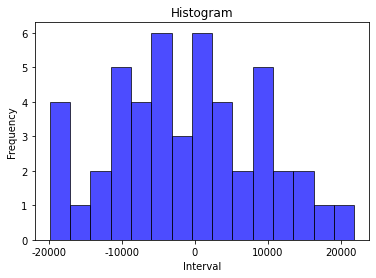

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['axes.unicode_minus']=False
plt.hist(last_four_year_loss,bins=15, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title("Histogram")
plt.show()


# Now we work on 3.d

In [0]:
index_for_ul1=index_for_ul.copy()
for i in range(total_num-1):
  if tradingdays.index[i].day > tradingdays.index[i+1].day and tradingdays.index[i].year == 2015 and tradingdays.index[i].month==12:
    a=tradingdays.index[i]
b=tradingdays.index.tolist().index(a)
index_for_ul1.insert(0,b)
del index_for_ul1[-1]
#index_for_ul1

In [0]:
u_list=[]
for j in range(48):
  b=index_for_ul1[j]
  u=[]
  for i in range(15):
    a=log_return[i][(b-1005):b]
    u.append(a.mean())
  u_list.append(u)

u_list[0]

[0.000651307449392186,
 0.0021349482485699574,
 0.0015797717851378486,
 0.00035364876830305727,
 0.0008361326272778298,
 0.00105605906408247,
 0.00091106047752495,
 0.00031750836162060606,
 0.000685530844762954,
 0.001969060609241371,
 -0.00020214014350277264,
 0.00034285946574331256,
 0.0005483261772205701,
 0.00014893565823690226,
 0.0005458413382885153]

In [0]:
cov_list=[]
for j in range(48):
  b=index_for_ul1[j]
  df_temp={}
  for i in range(15):
    df_temp[index_list[i]]=log_return[i][(b-1005):b]
  df = pd.DataFrame(df_temp)
  cov_mat=df.cov()  
  cov_list.append(cov_mat)

len(cov_list)

48

In [0]:
linloss_list=[]
loss_list=[]
for n in range(48):
  b=n+48
  loss_appx=np.zeros(5000)
  linloss_appx=np.zeros(5000)
  loss=0
  linloss=0
  for i in range(5000):
    loss=0
    linloss=0
    var = np.random.multivariate_normal(mean=u, cov=cov_mat)
    for j in range(len(index_list)):
      a=index_list[j]
      linloss+=update_list[b].loc[a]['Share']*update_list[b].loc[a]['Adj Close']*var[j]
      loss+=update_list[b].loc[a]['Share']*update_list[b].loc[a]['Adj Close']*(np.exp(var[j])-1)
    linloss_appx[i]=-linloss
    loss_appx[i]=-loss
  linloss_list.append(linloss_appx)
  loss_list.append(loss_appx)

#loss_list
#linloss_list

In [0]:
t_loss_list=[]
df_list=[]
for j in range(48):
  b=index_for_ul1[j]
  four_year_loss=loss_series[(b-1005):b]
  para_t=stats.t.fit(four_year_loss)
  df_list.append(para_t[0])
  loss_t_list=np.zeros(5000)
  for i in range(5000):
    loss_t_list[i]=stats.t.rvs(loc = para_t[1], df = para_t[0], scale = para_t[2])
  t_loss_list.append(loss_t_list)

#t_loss_list
#df_list

# Now we work on 3.e

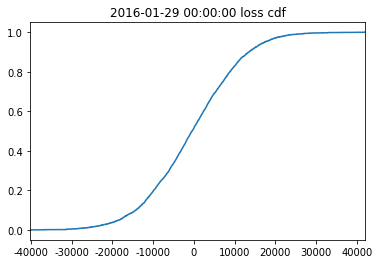

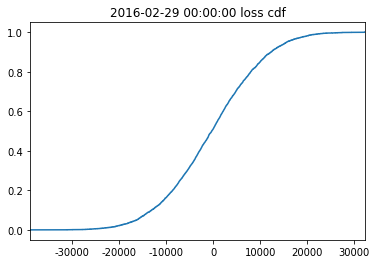

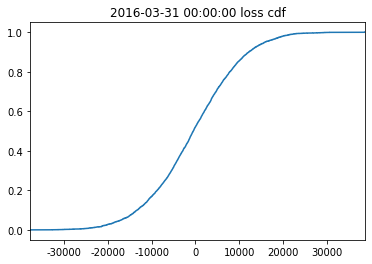

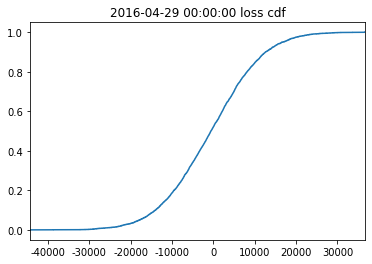

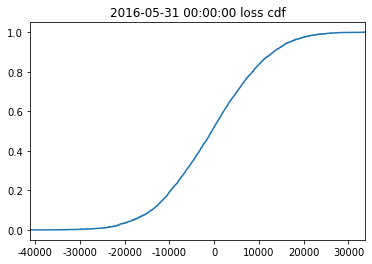

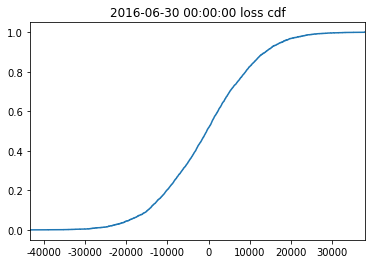

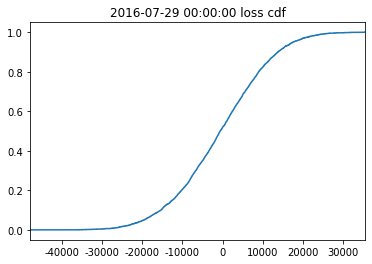

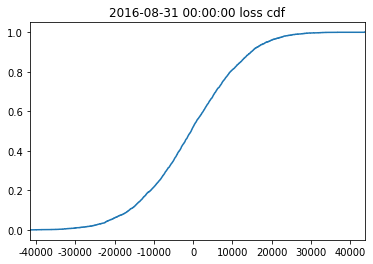

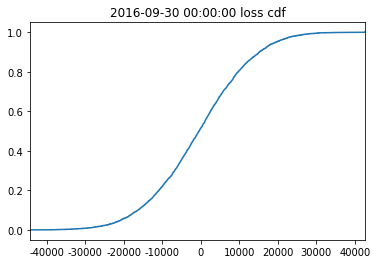

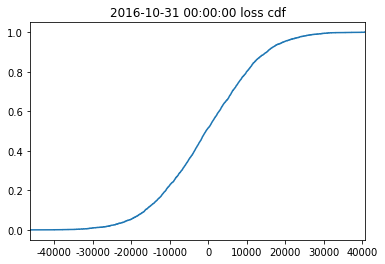

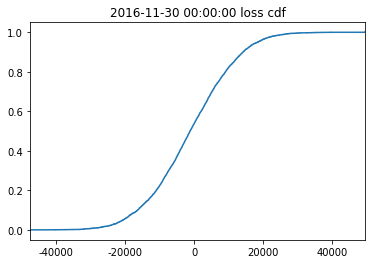

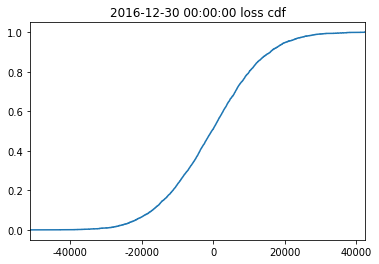

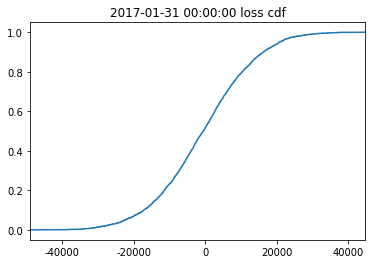

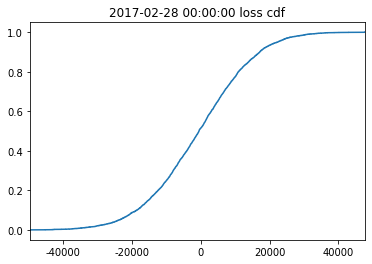

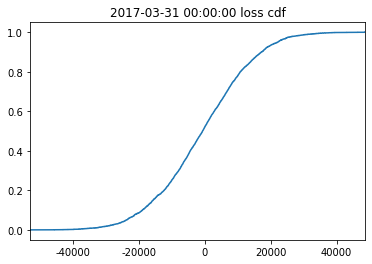

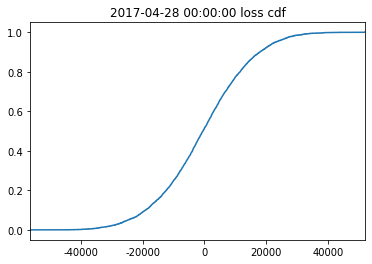

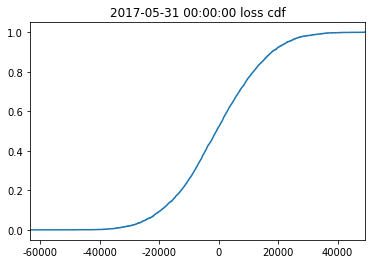

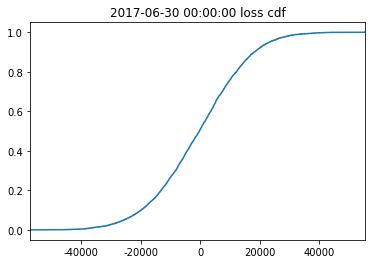

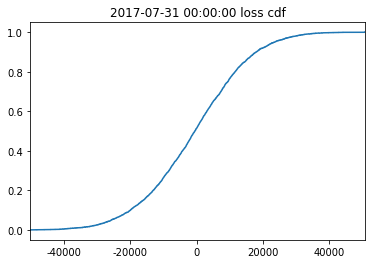

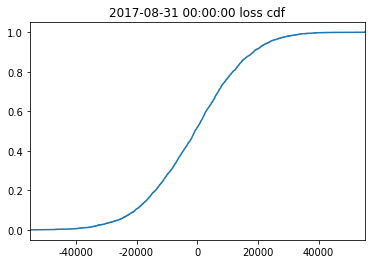

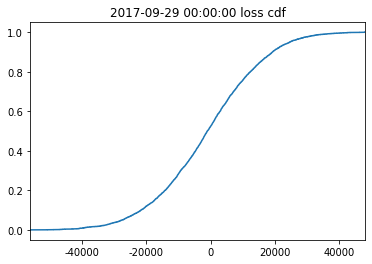

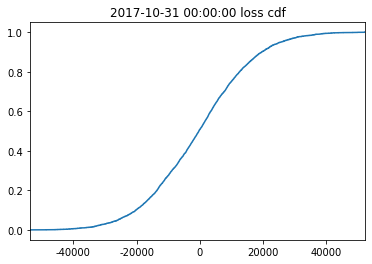

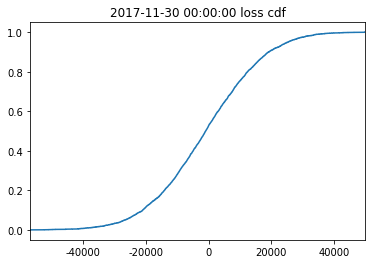

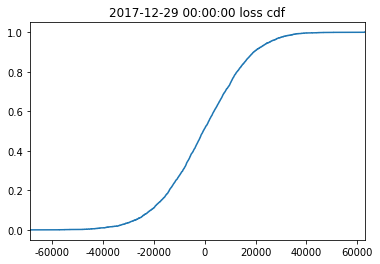

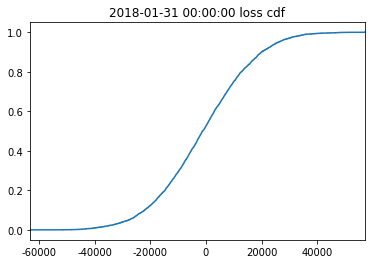

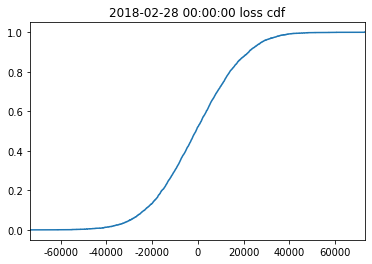

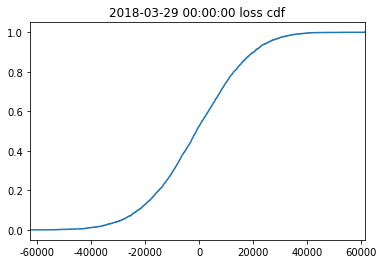

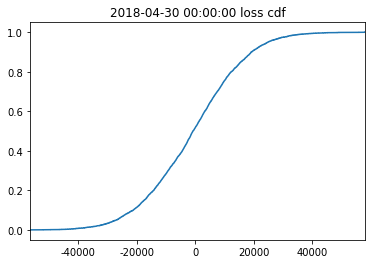

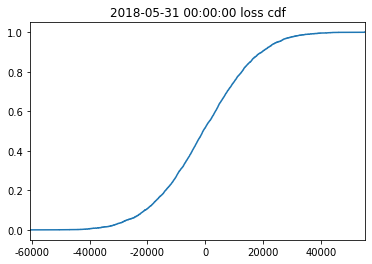

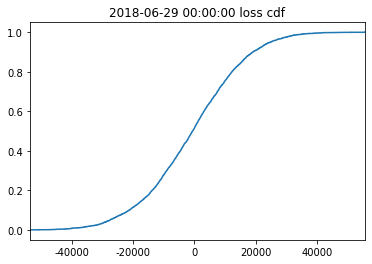

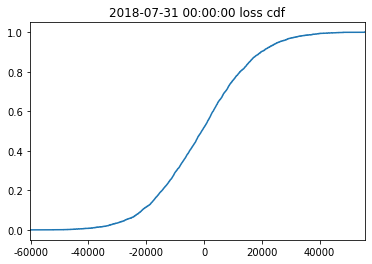

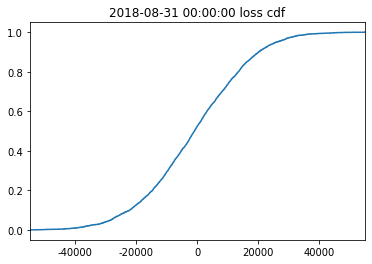

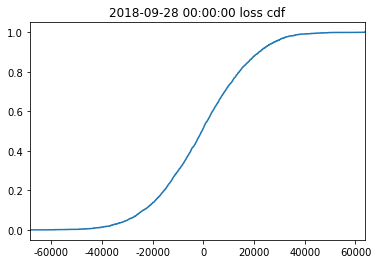

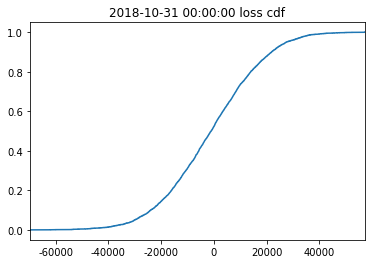

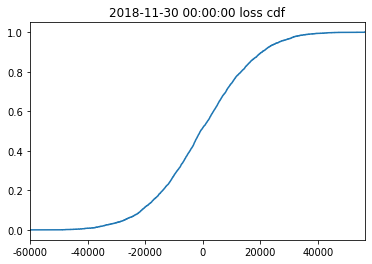

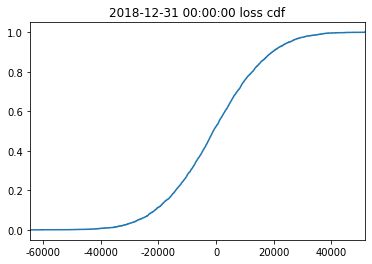

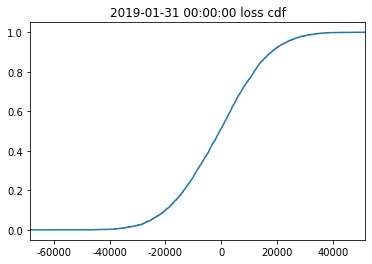

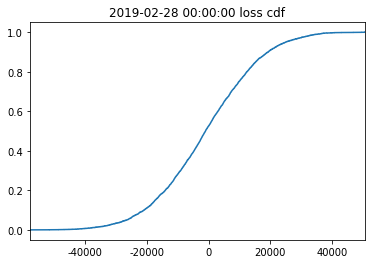

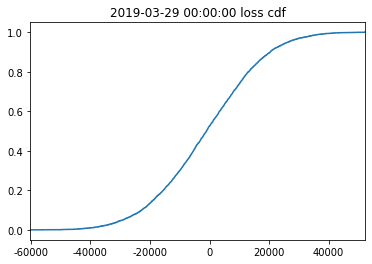

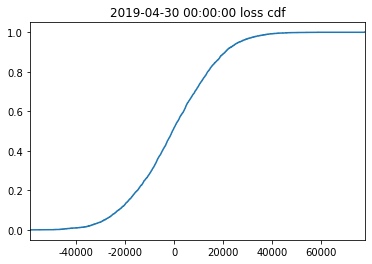

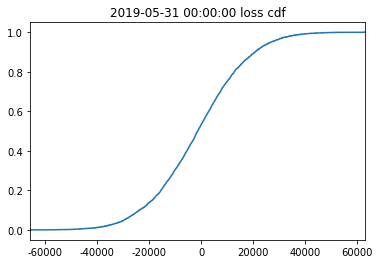

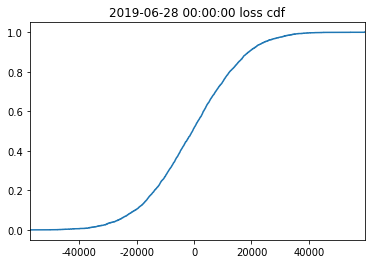

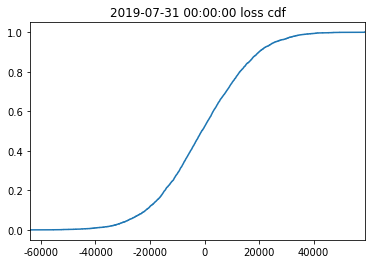

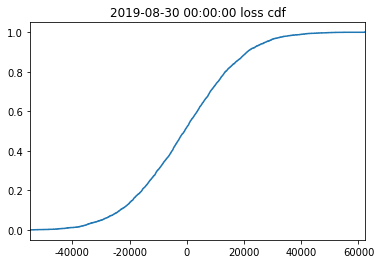

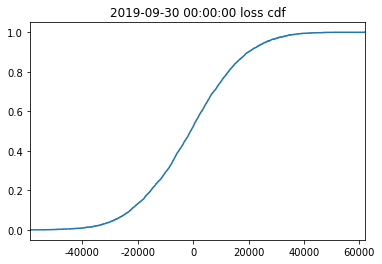

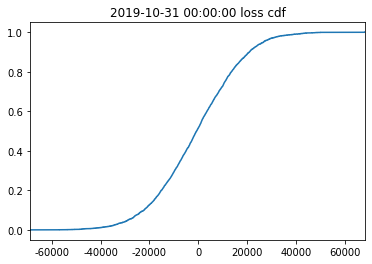

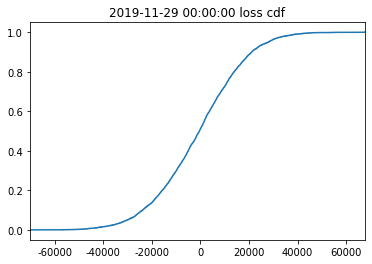

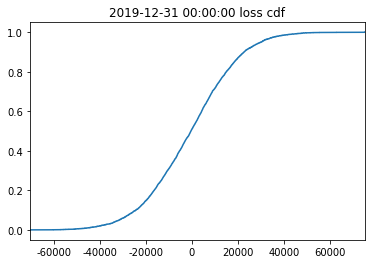

In [0]:
for i in range(len(loss_list)):
  cdf_function(loss_list[i],str(date_list1[i])+' loss cdf')
  plt.show()


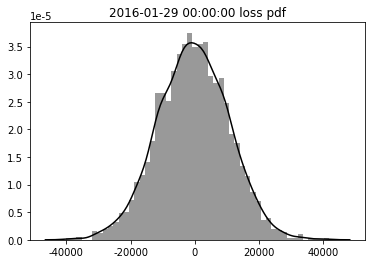

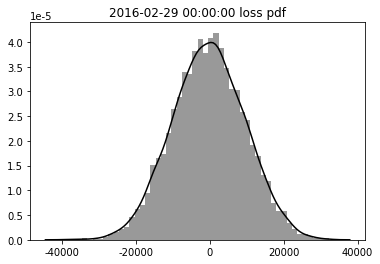

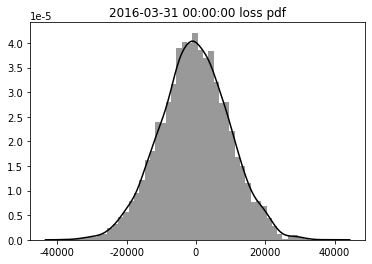

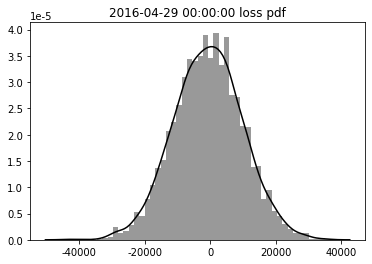

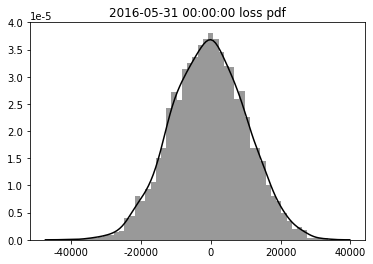

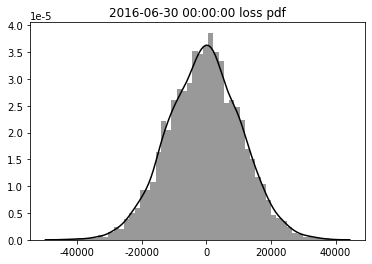

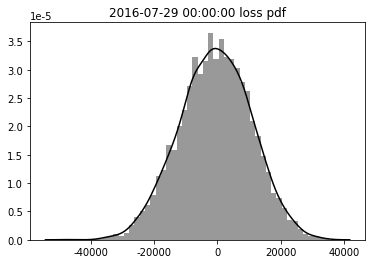

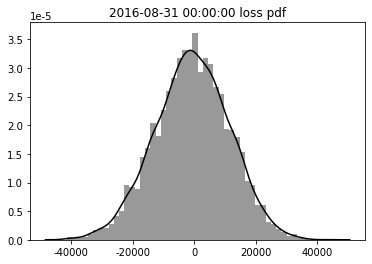

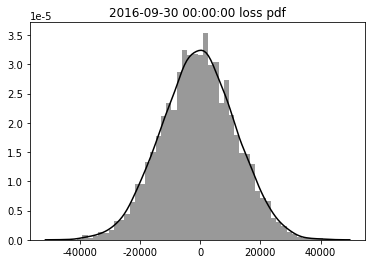

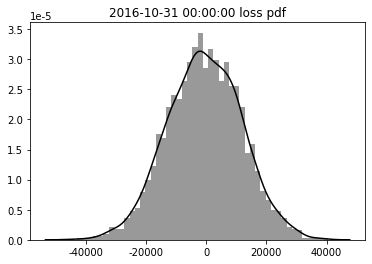

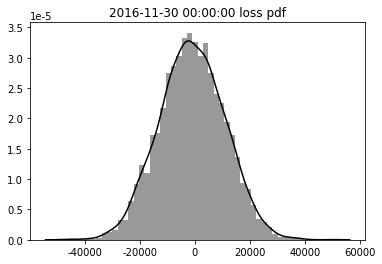

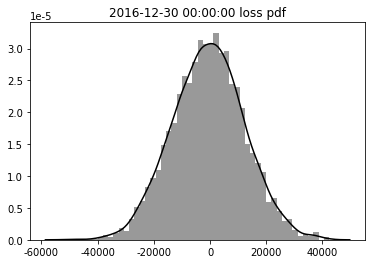

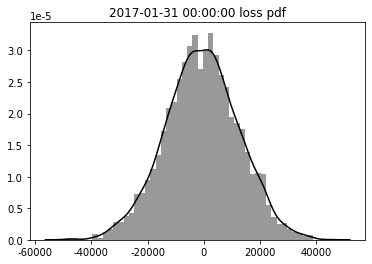

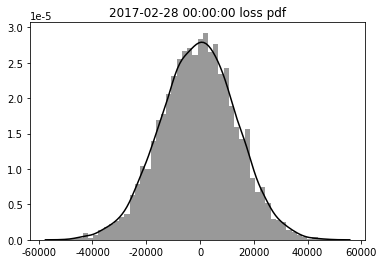

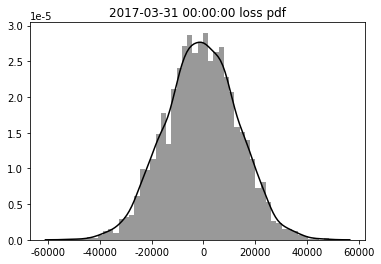

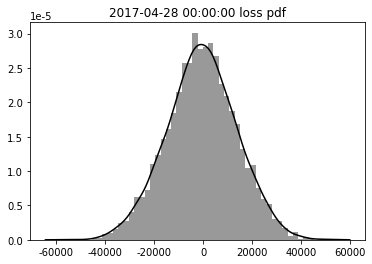

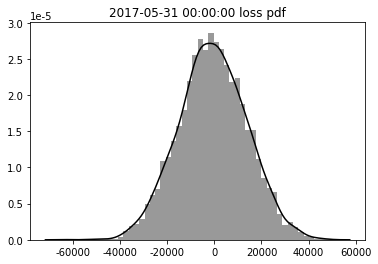

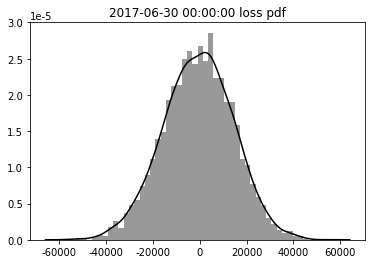

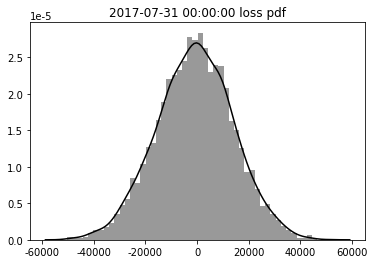

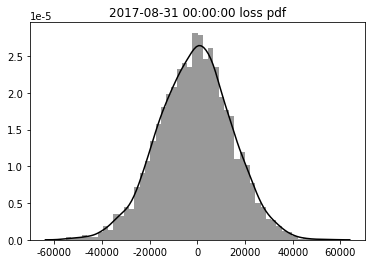

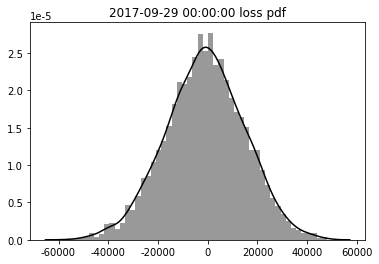

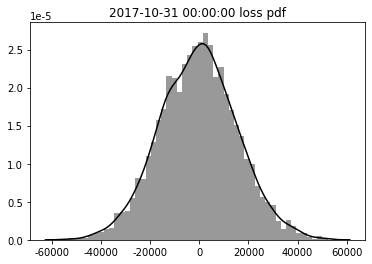

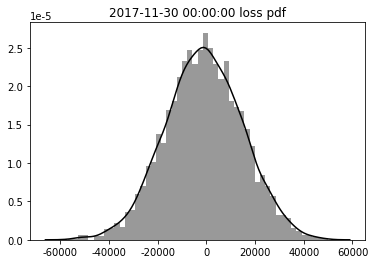

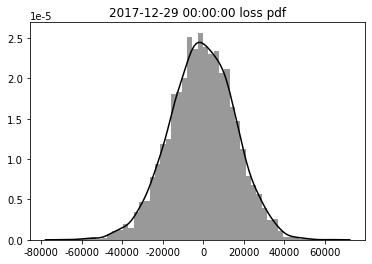

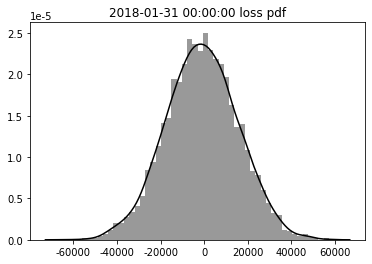

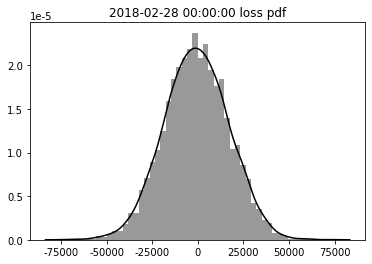

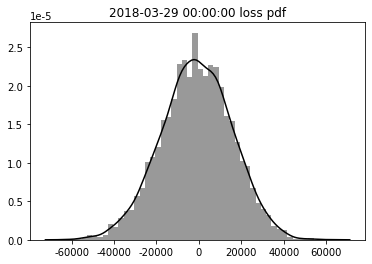

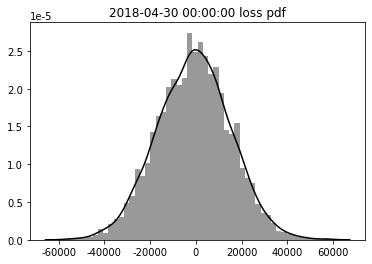

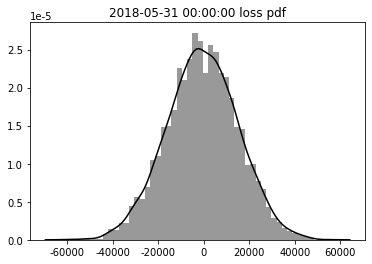

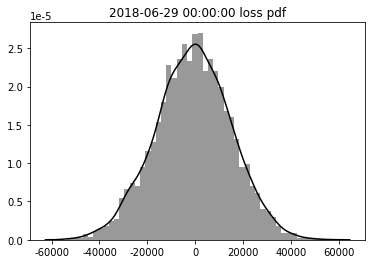

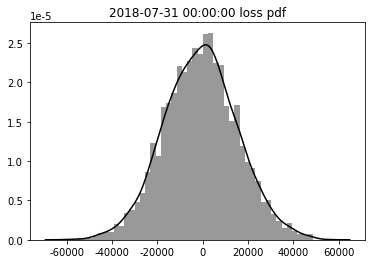

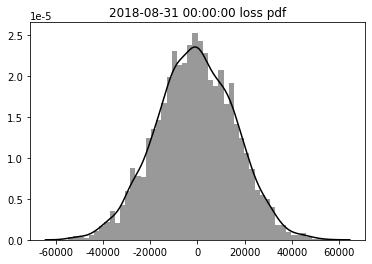

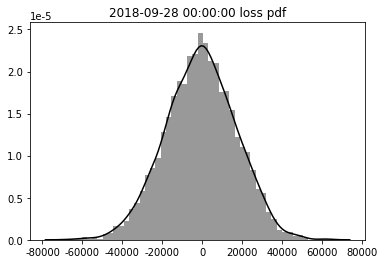

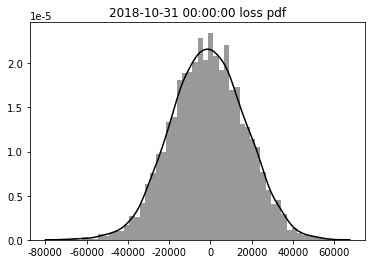

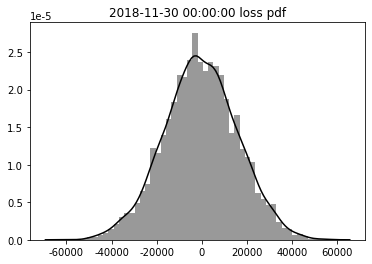

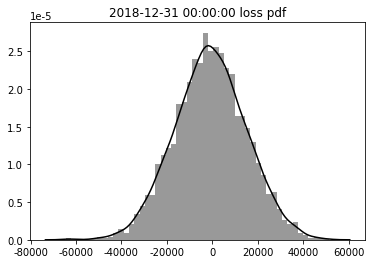

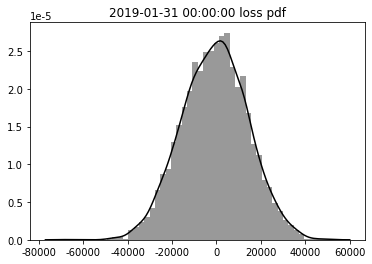

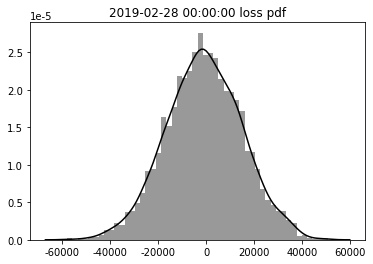

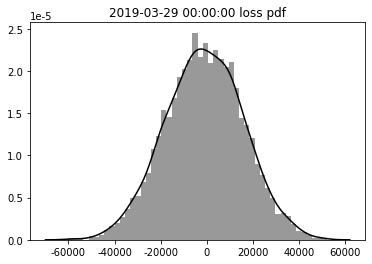

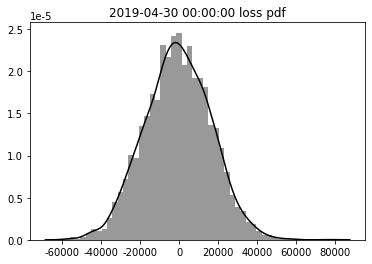

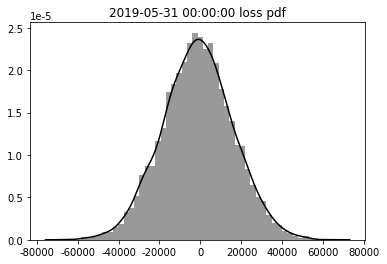

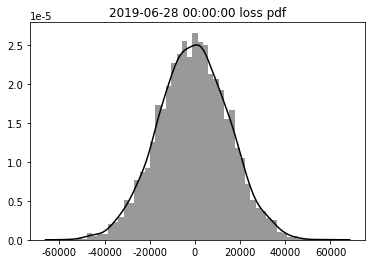

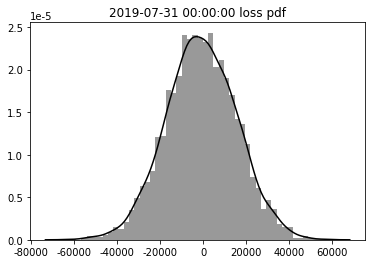

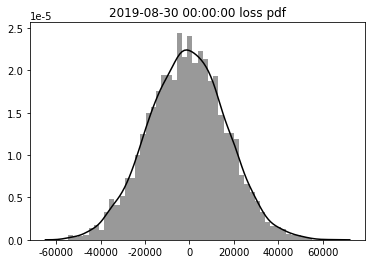

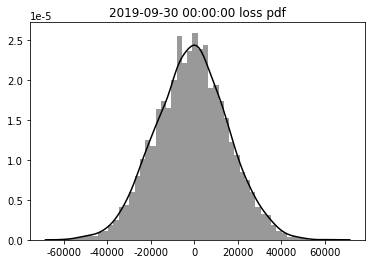

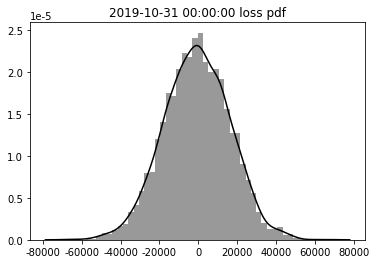

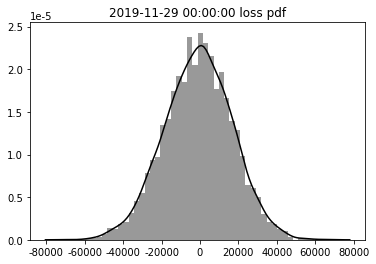

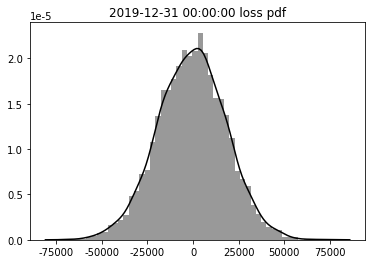

In [0]:
for i in range(len(loss_list)):
  pdf_function1(loss_list[i],str(date_list1[i])+' loss pdf')
  plt.show()


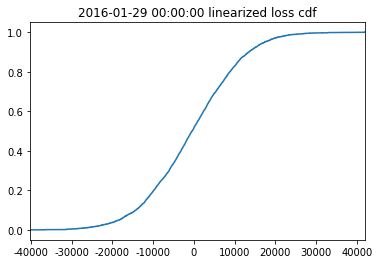

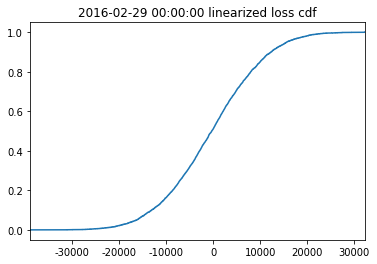

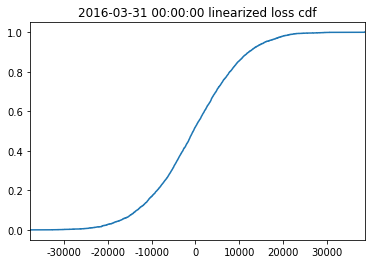

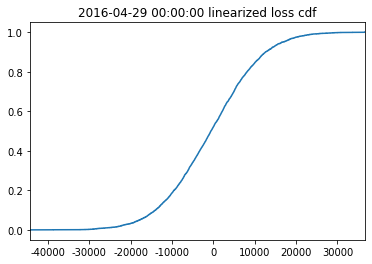

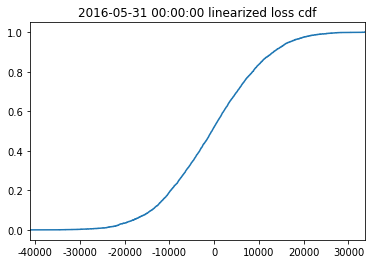

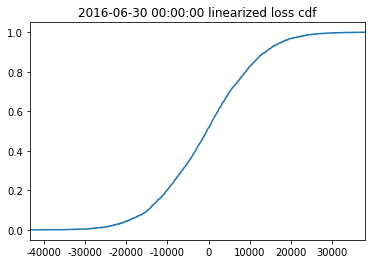

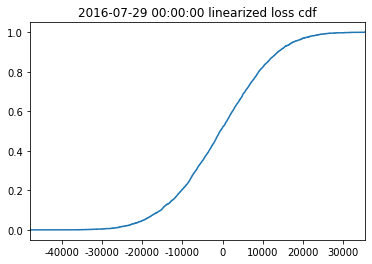

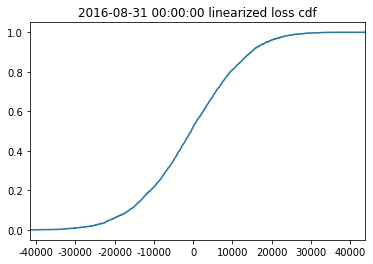

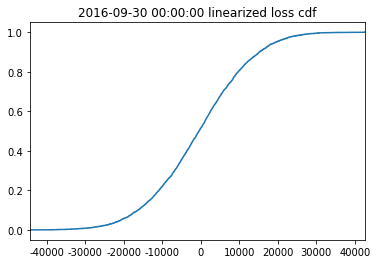

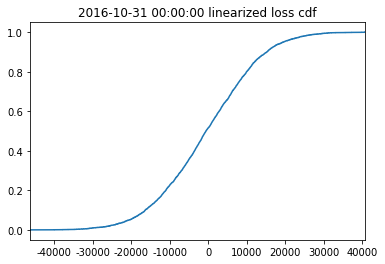

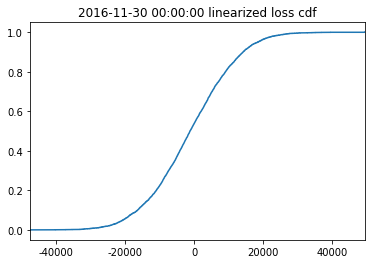

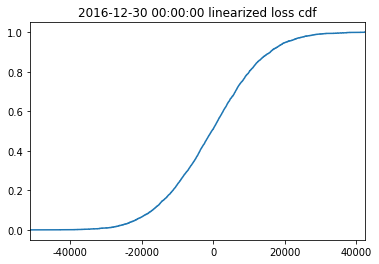

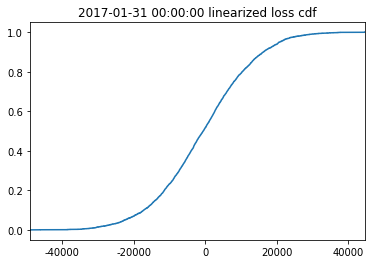

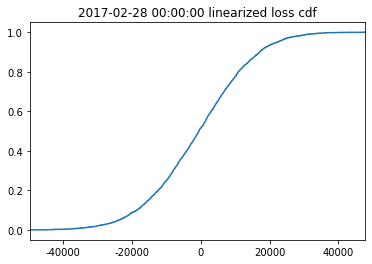

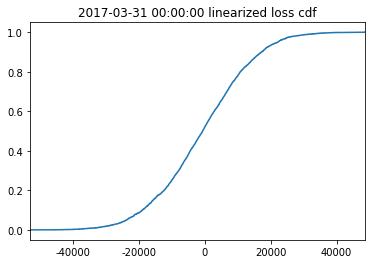

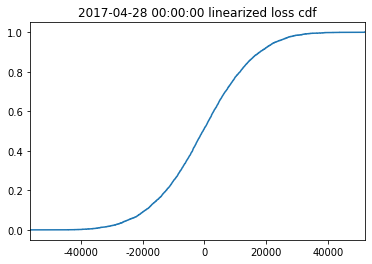

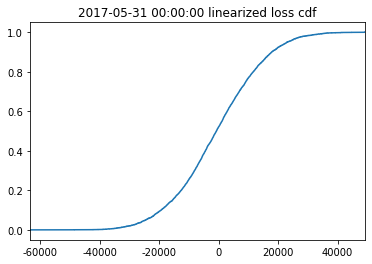

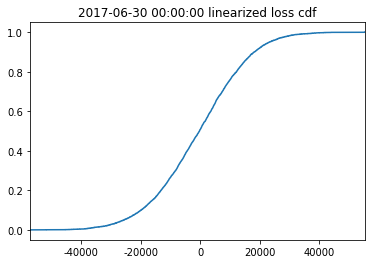

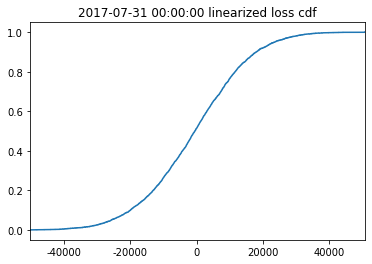

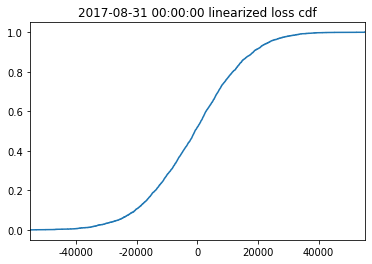

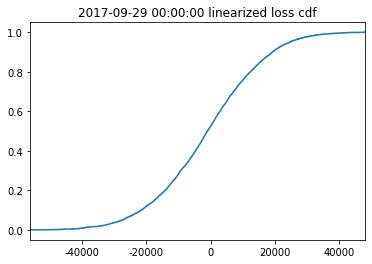

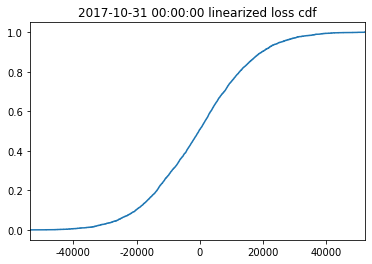

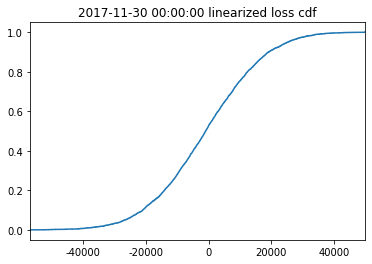

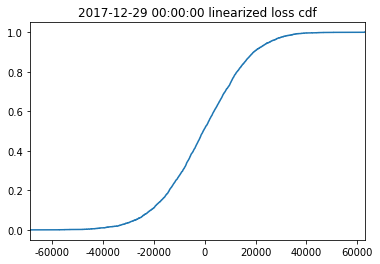

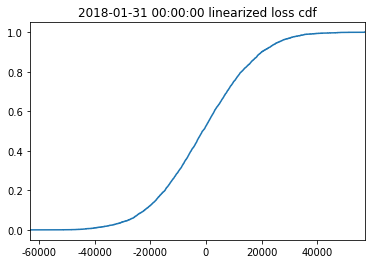

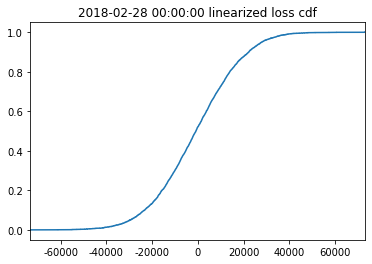

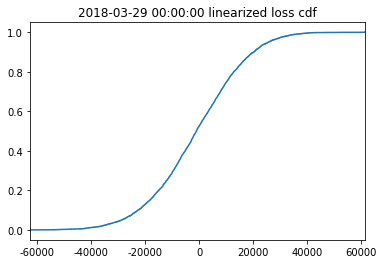

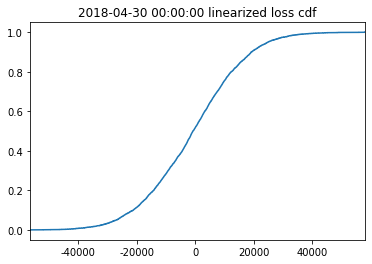

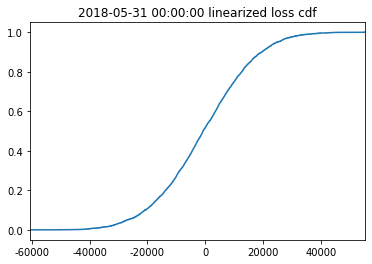

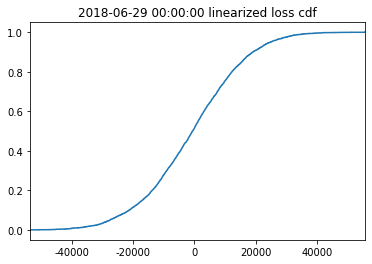

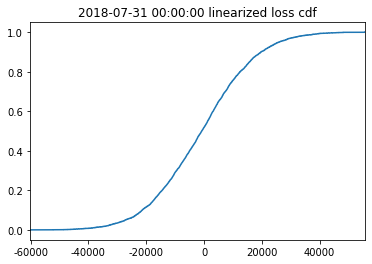

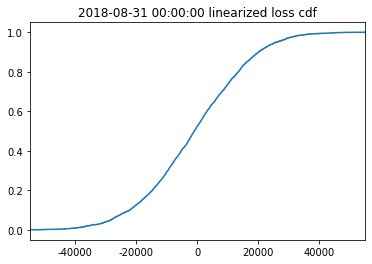

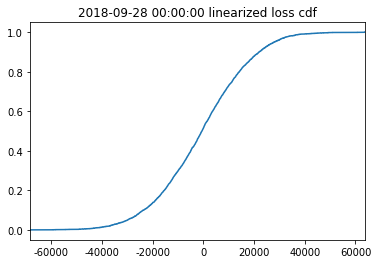

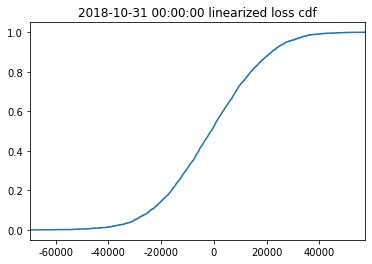

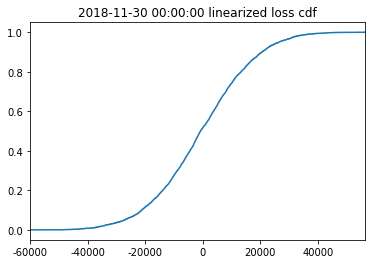

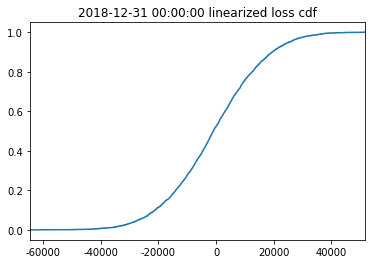

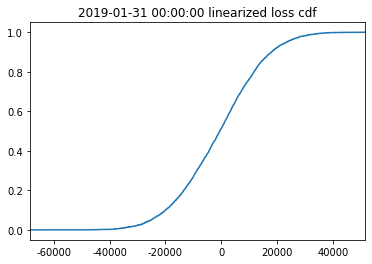

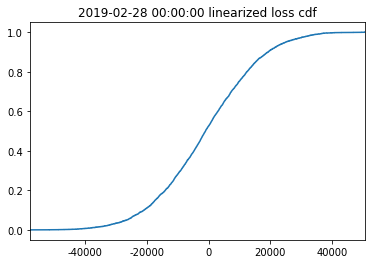

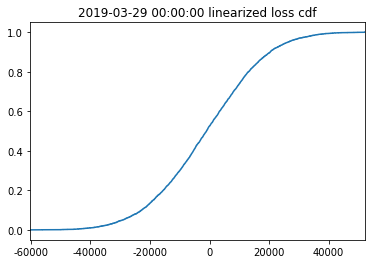

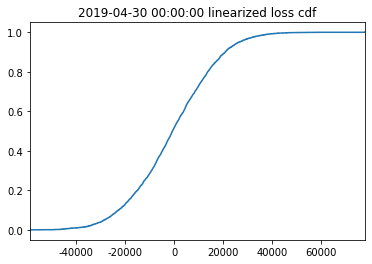

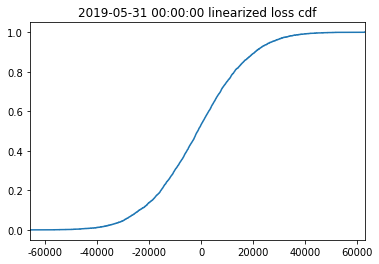

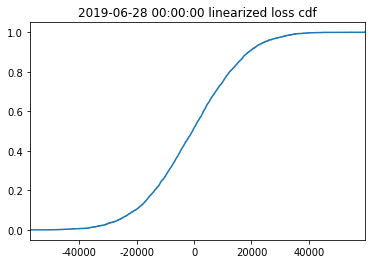

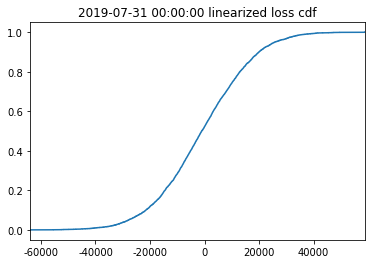

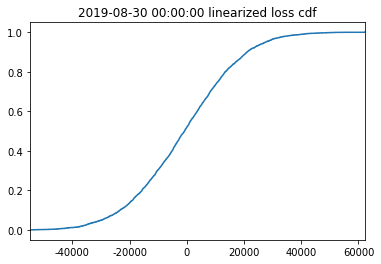

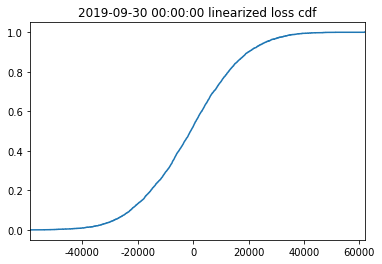

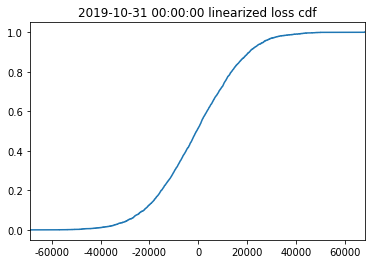

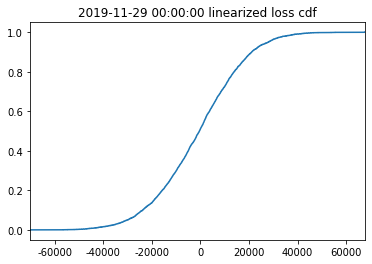

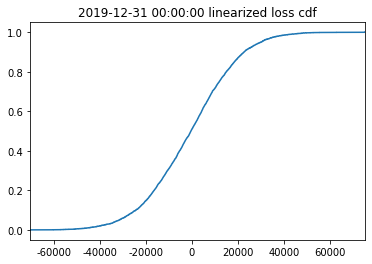

In [0]:
for i in range(len(linloss_list)):
  cdf_function(loss_list[i],str(date_list1[i])+' linearized loss cdf')
  plt.show()


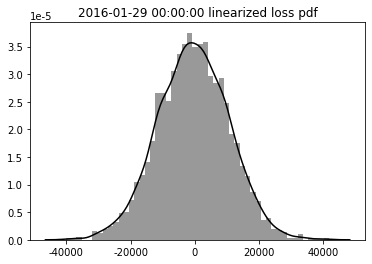

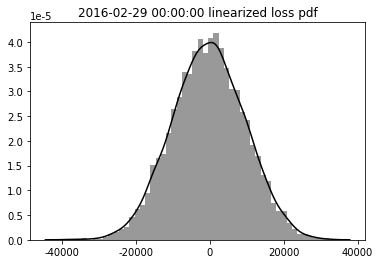

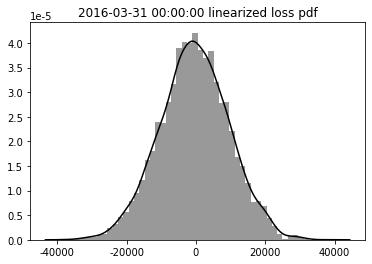

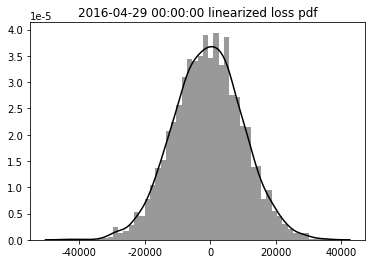

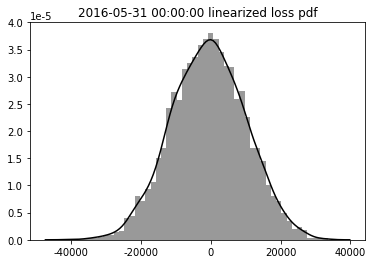

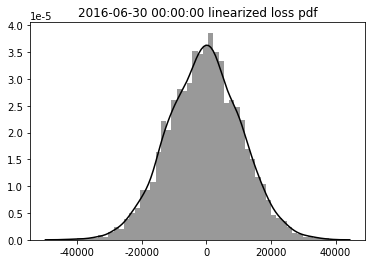

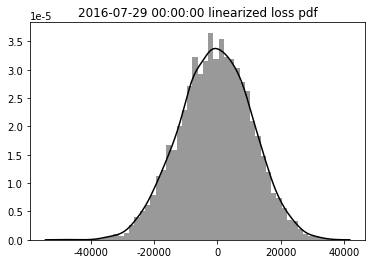

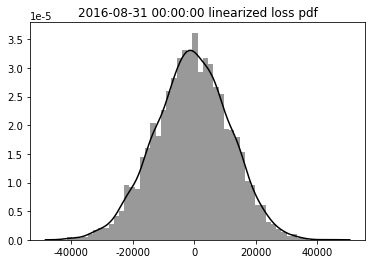

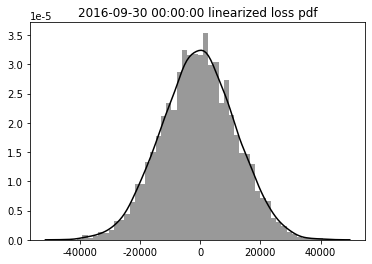

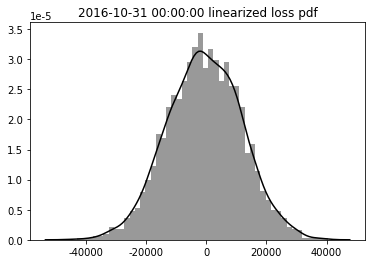

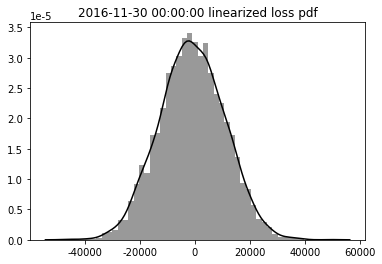

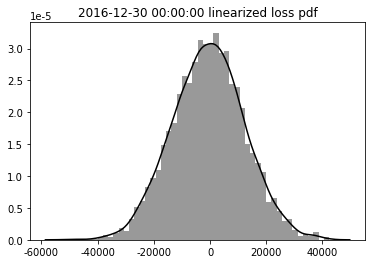

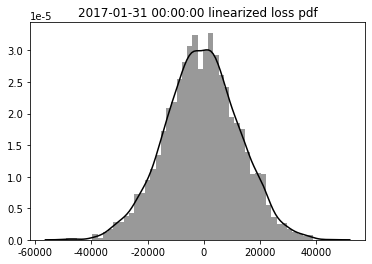

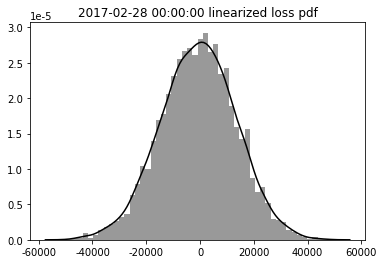

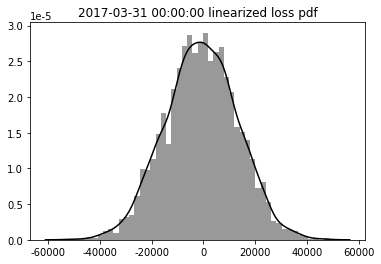

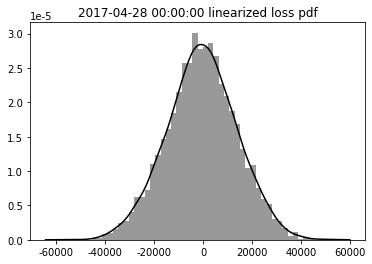

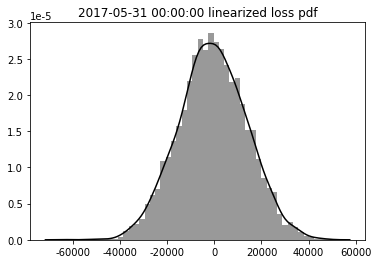

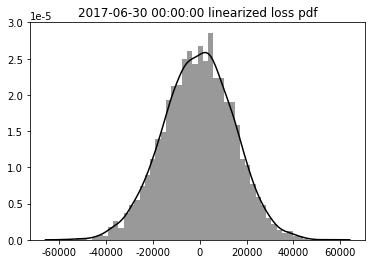

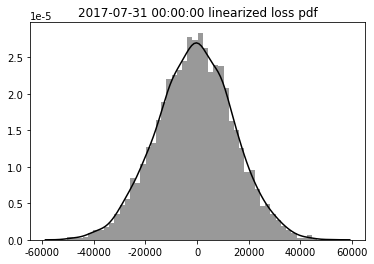

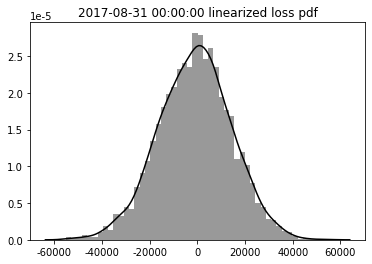

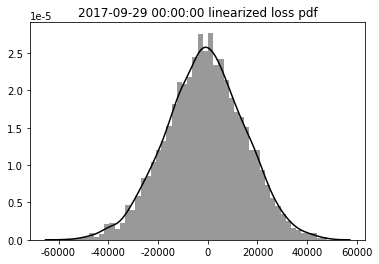

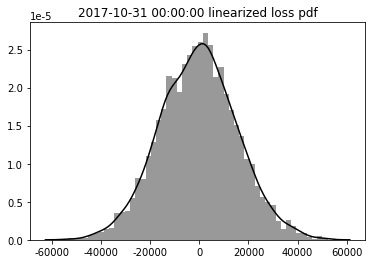

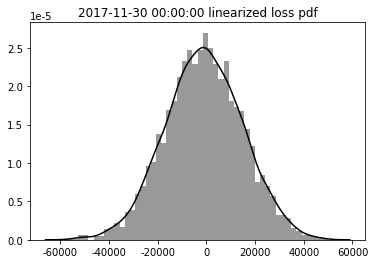

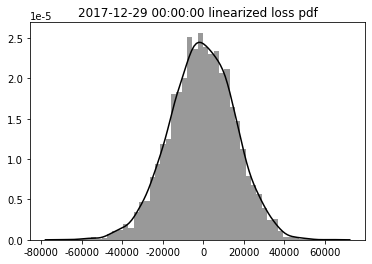

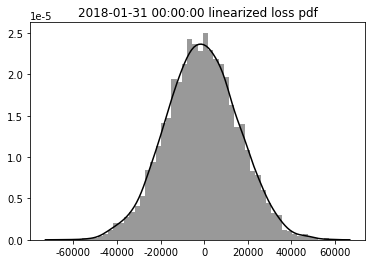

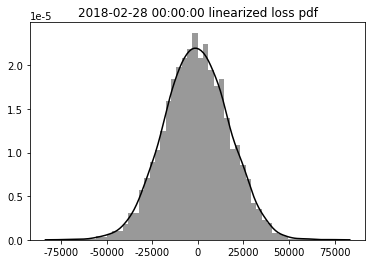

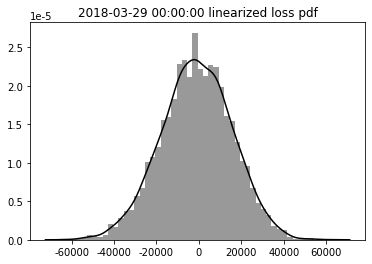

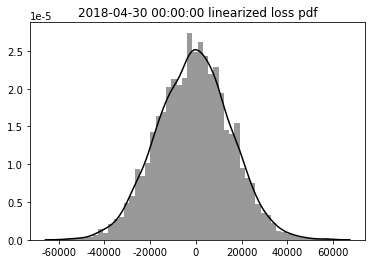

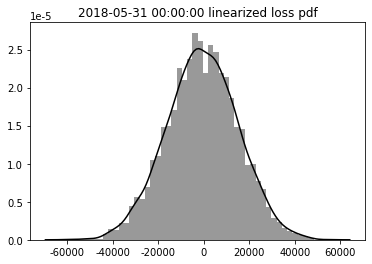

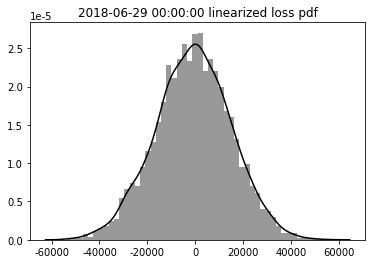

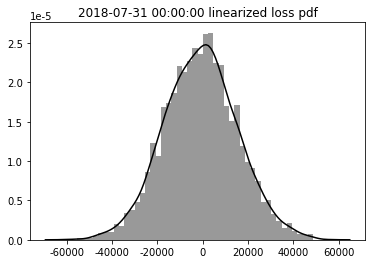

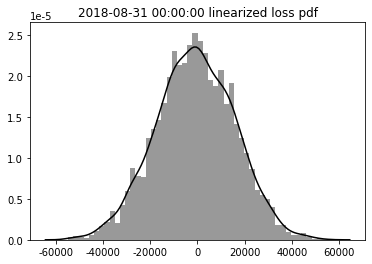

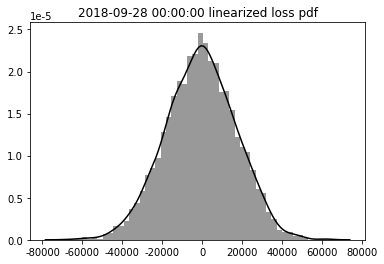

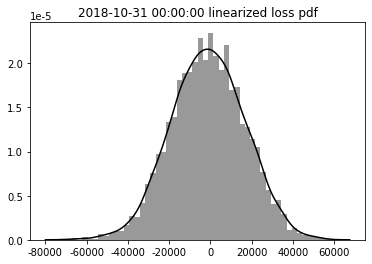

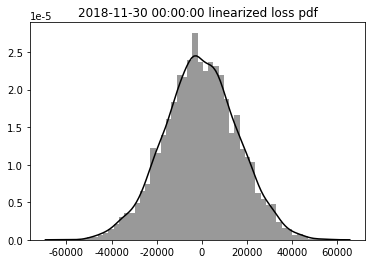

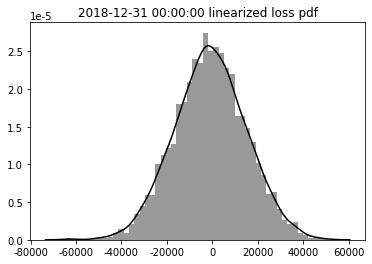

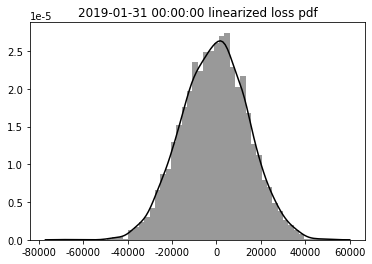

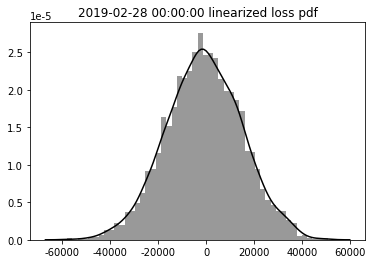

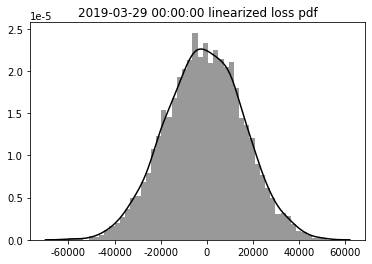

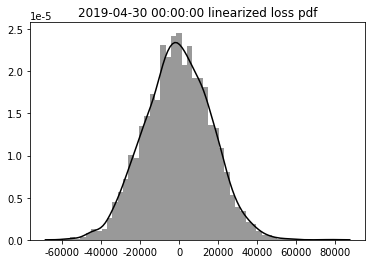

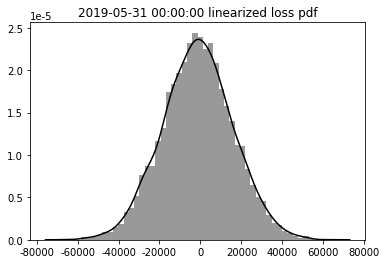

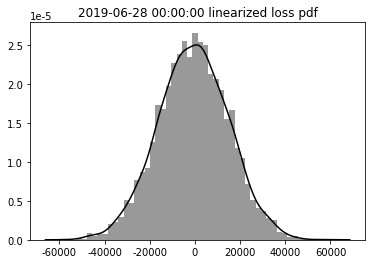

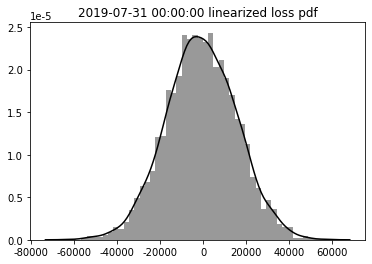

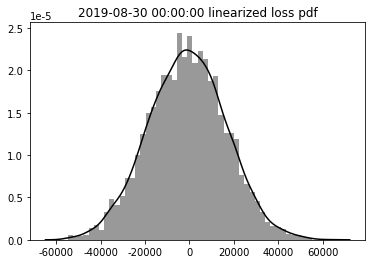

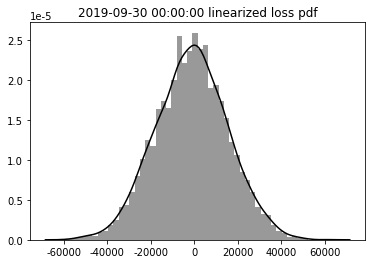

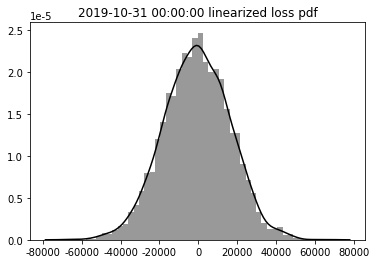

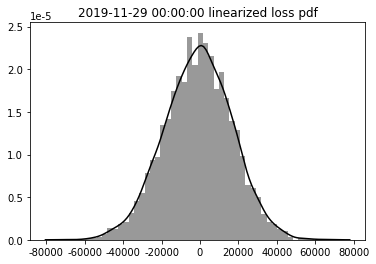

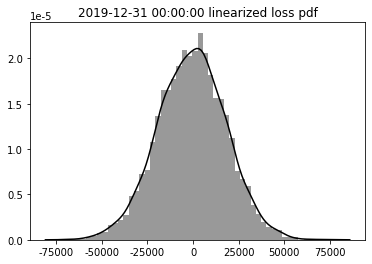

In [0]:
for i in range(len(linloss_list)):
  pdf_function1(loss_list[i],str(date_list1[i])+' linearized loss pdf')
  plt.show()


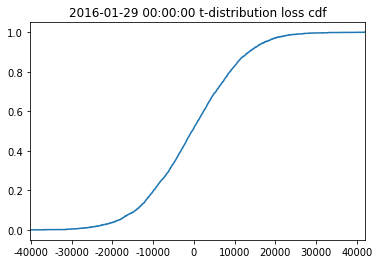

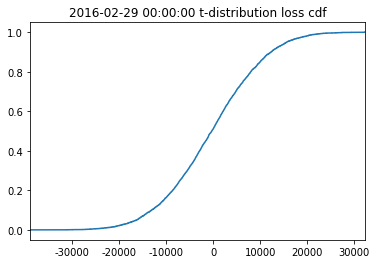

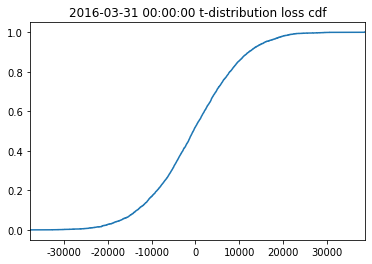

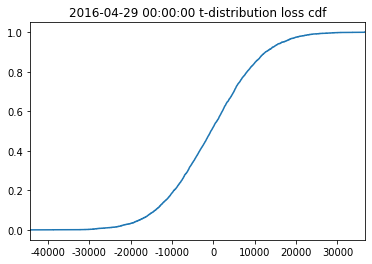

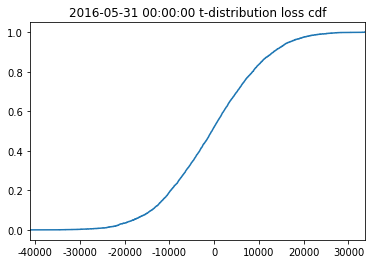

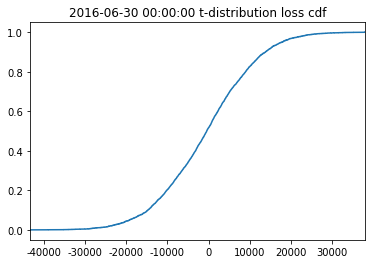

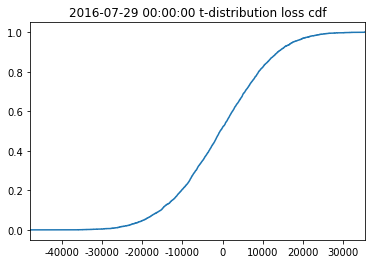

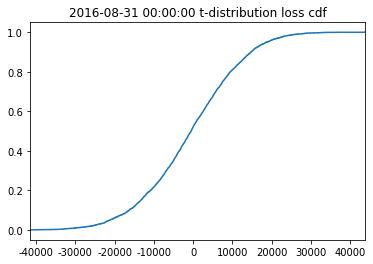

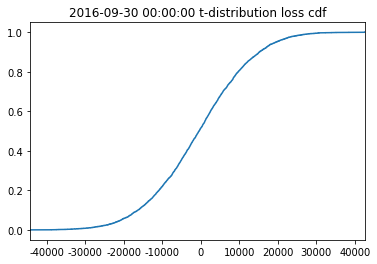

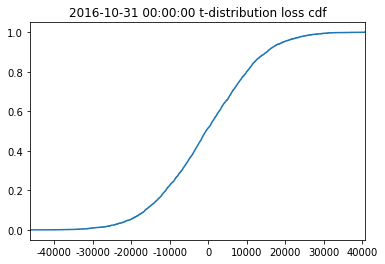

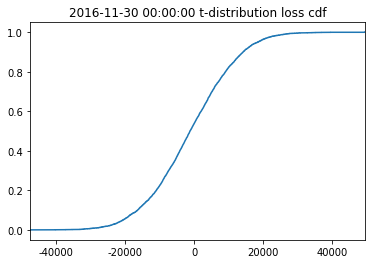

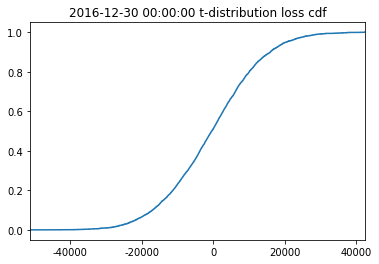

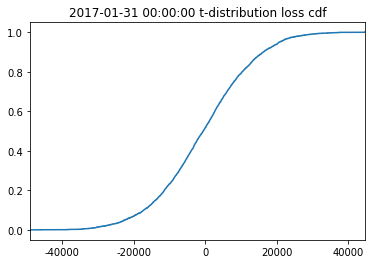

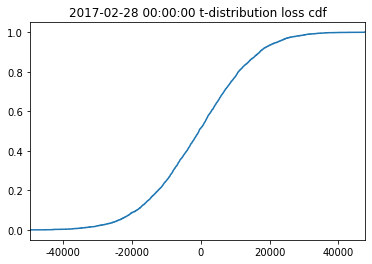

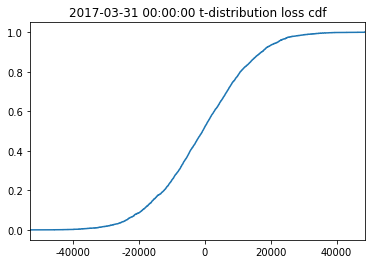

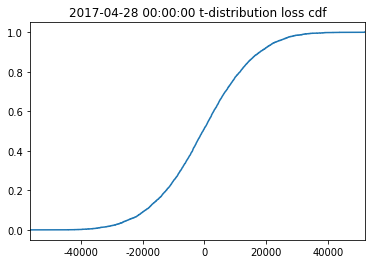

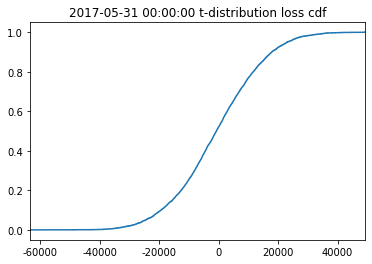

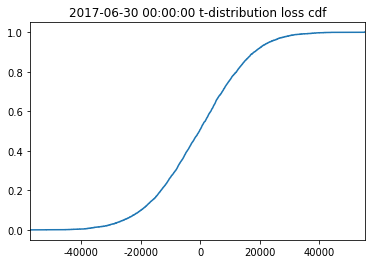

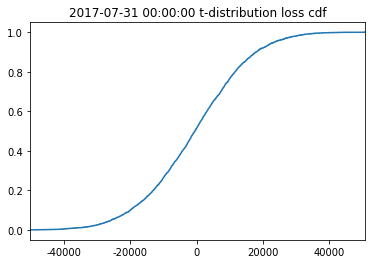

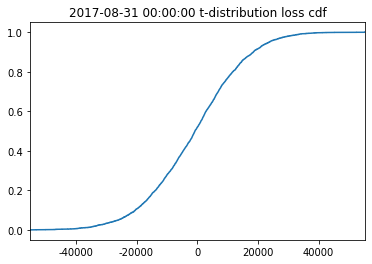

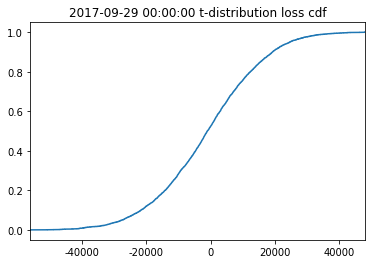

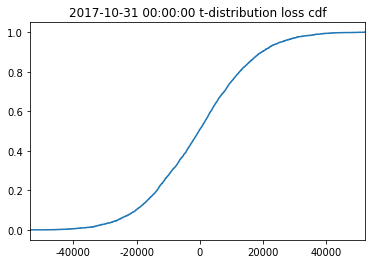

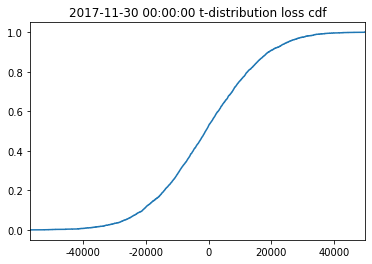

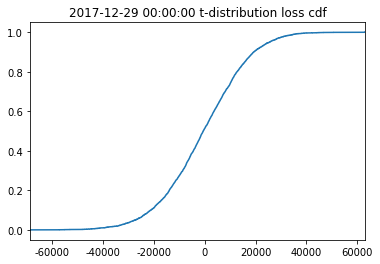

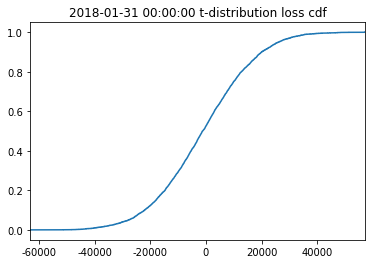

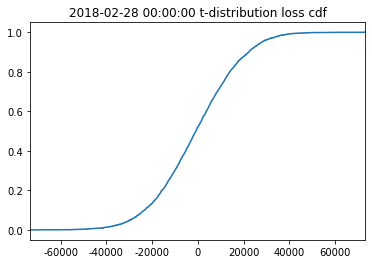

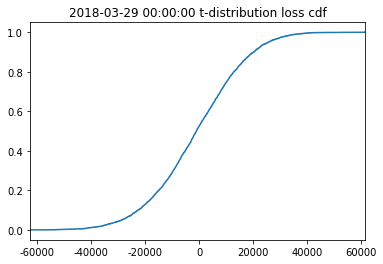

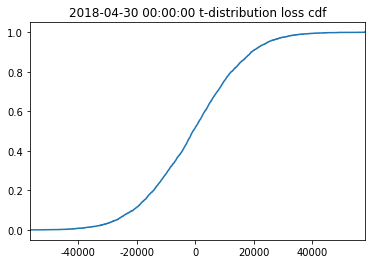

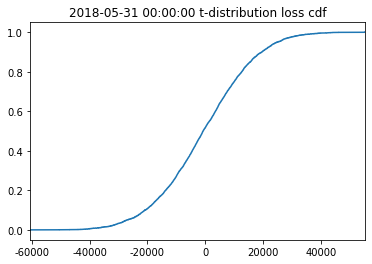

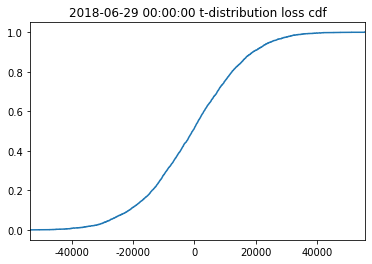

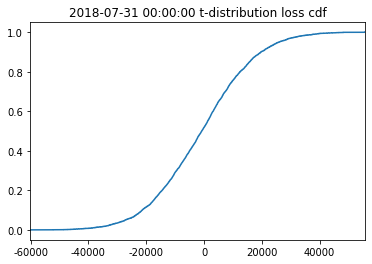

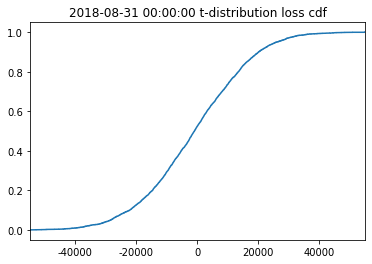

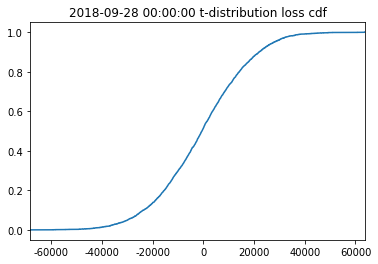

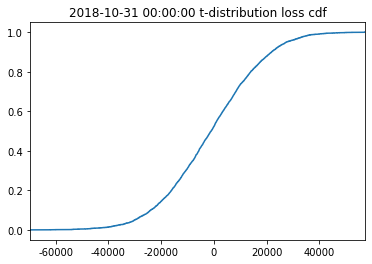

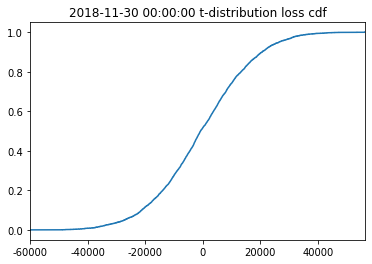

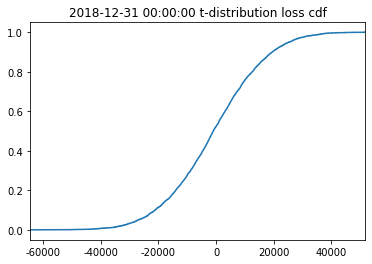

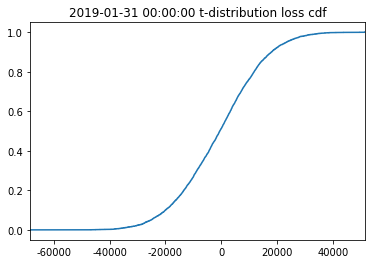

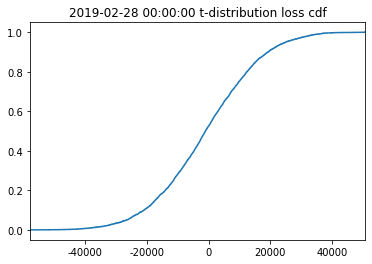

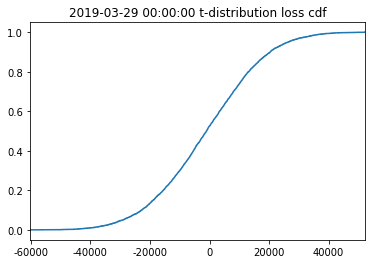

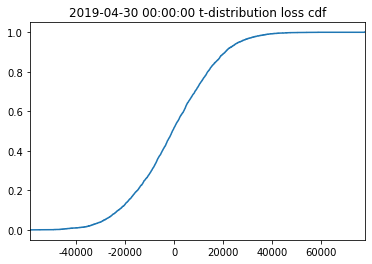

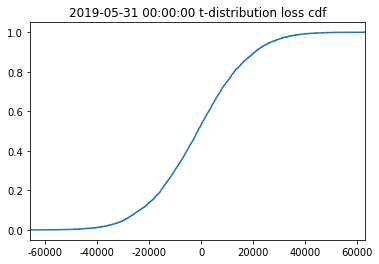

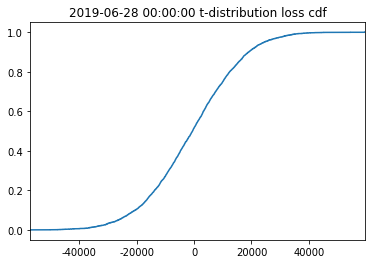

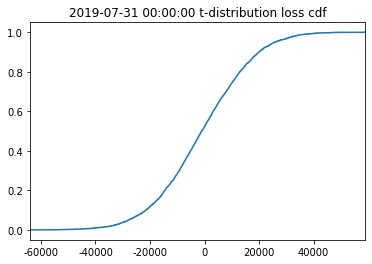

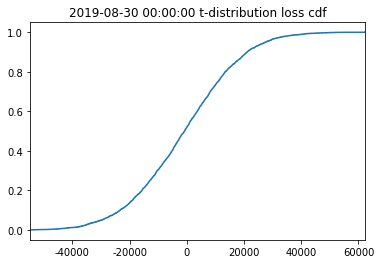

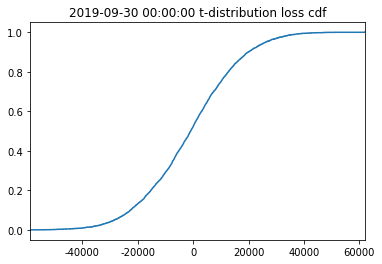

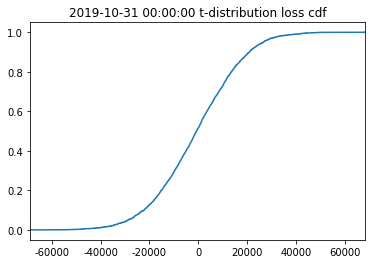

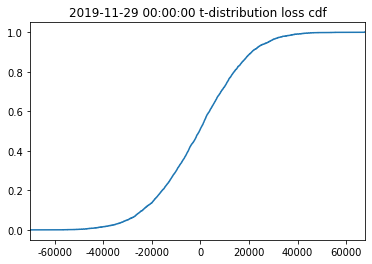

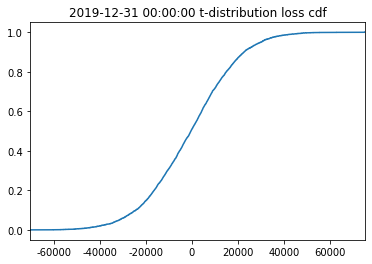

In [0]:
for i in range(len(t_loss_list)):
  cdf_function(loss_list[i],str(date_list1[i])+' t-distribution loss cdf')
  plt.show()


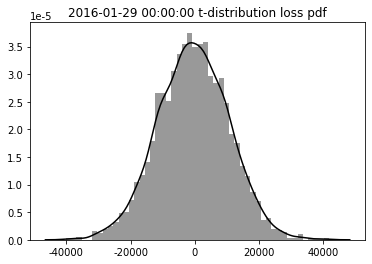

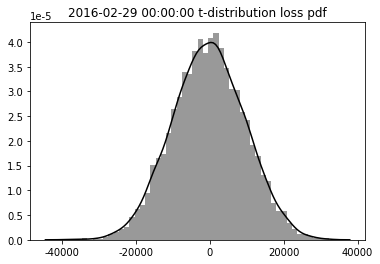

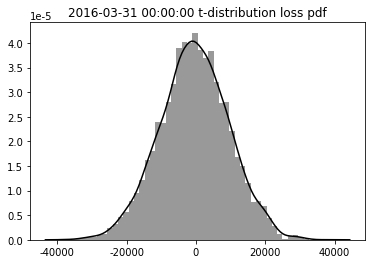

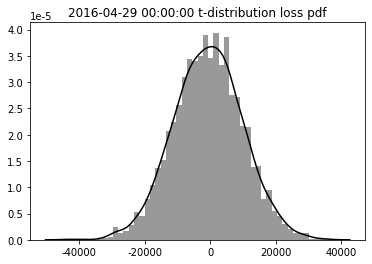

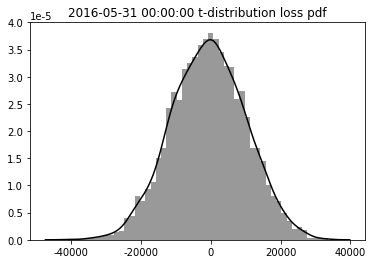

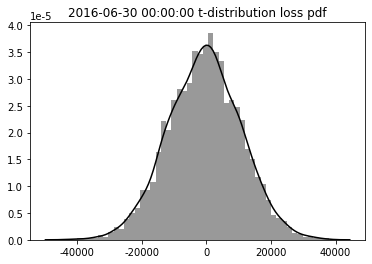

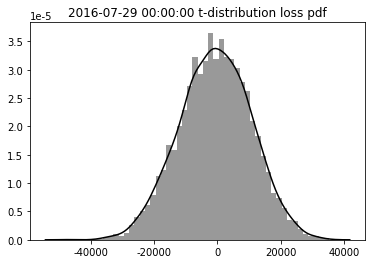

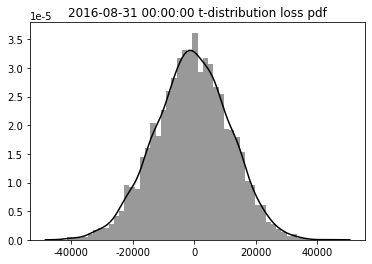

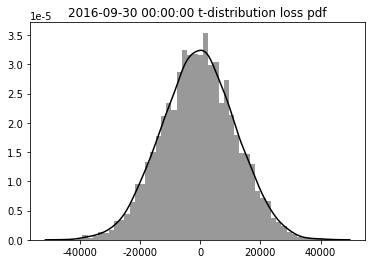

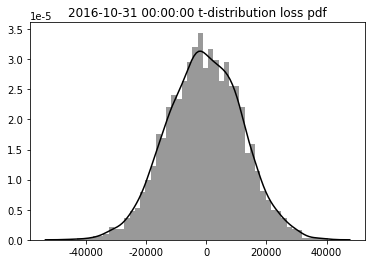

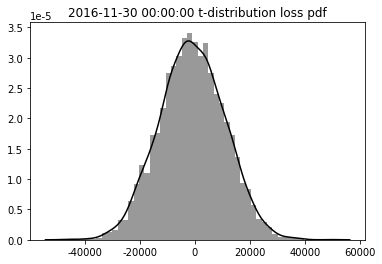

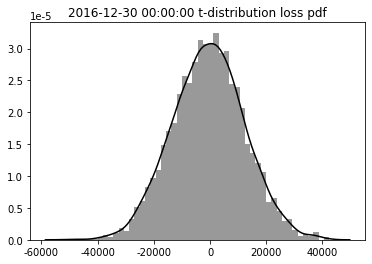

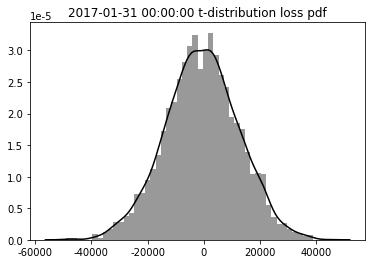

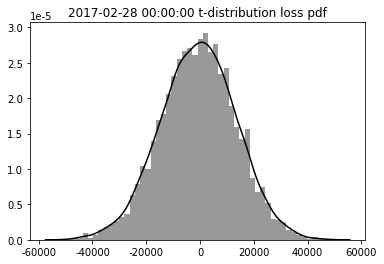

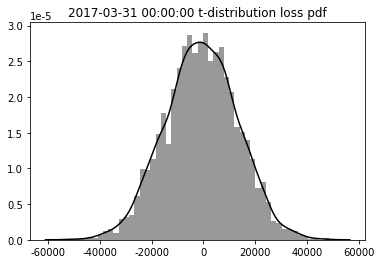

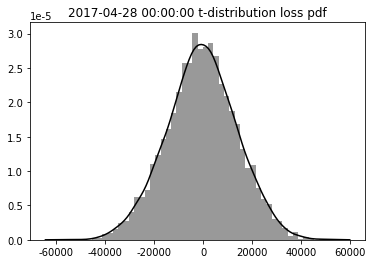

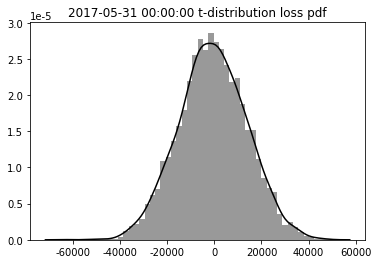

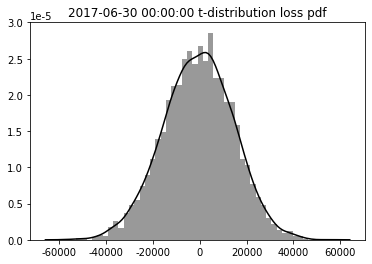

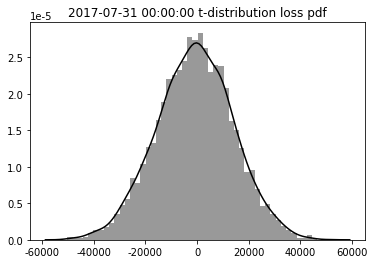

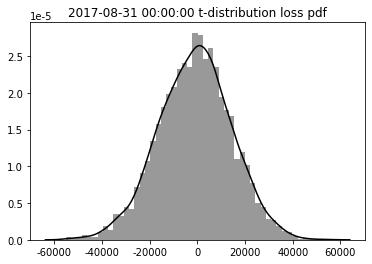

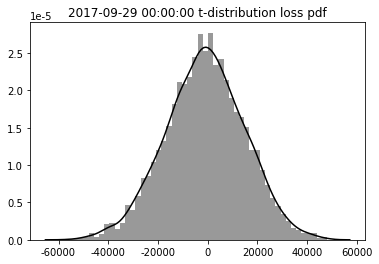

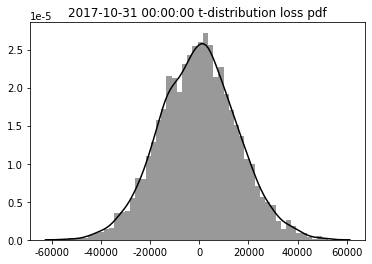

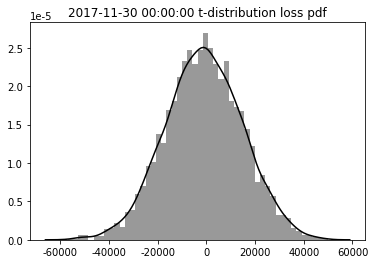

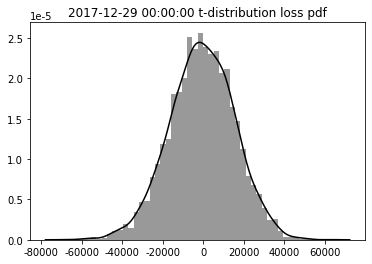

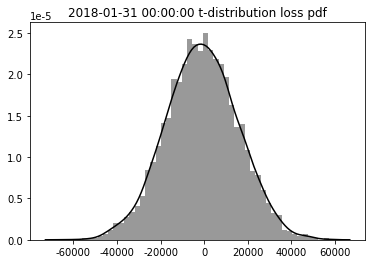

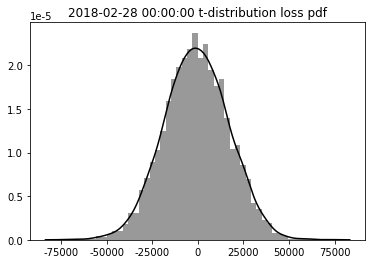

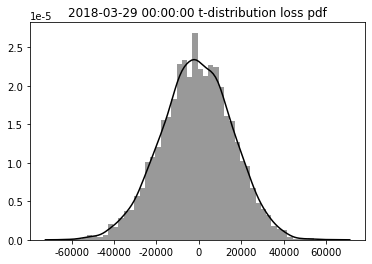

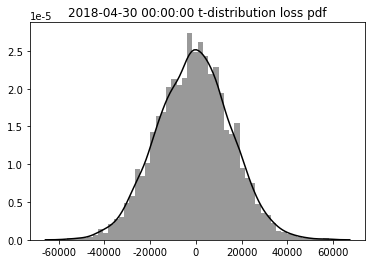

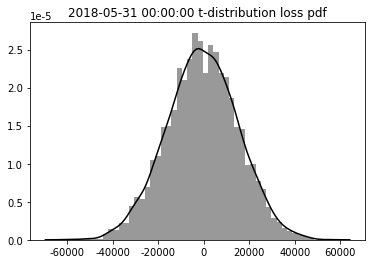

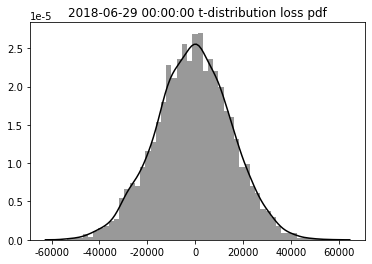

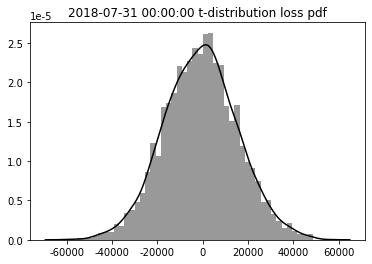

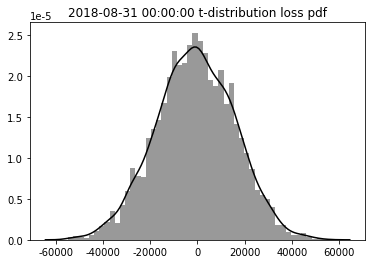

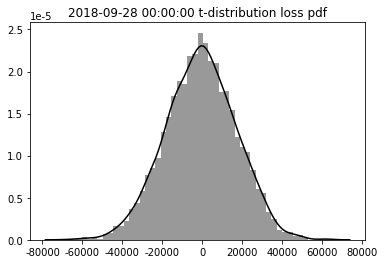

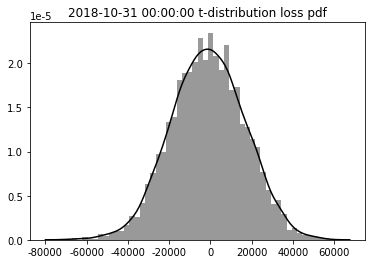

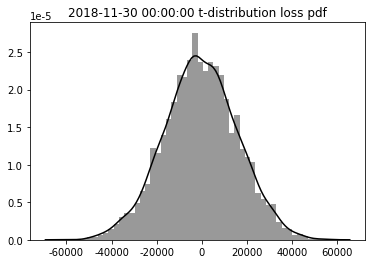

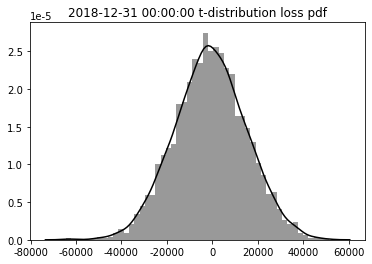

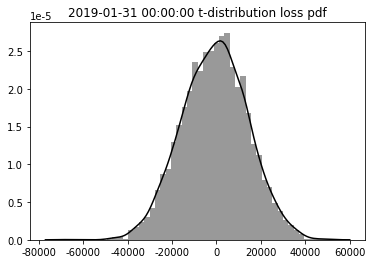

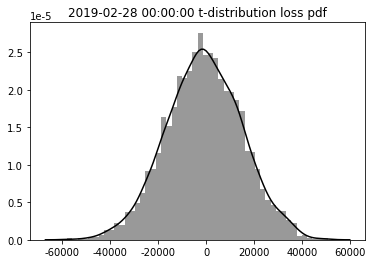

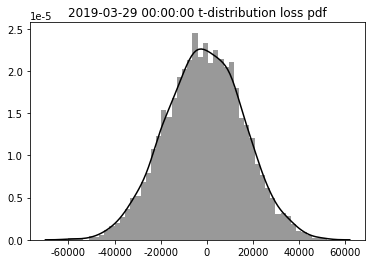

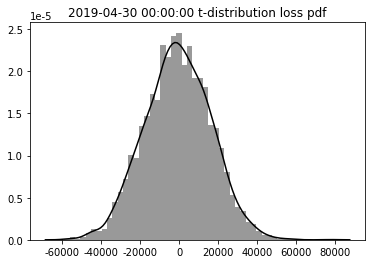

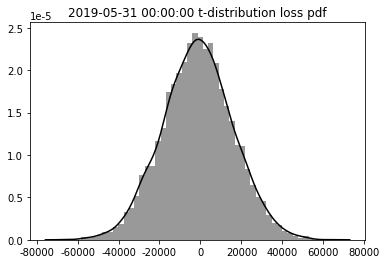

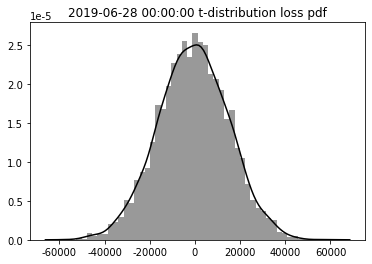

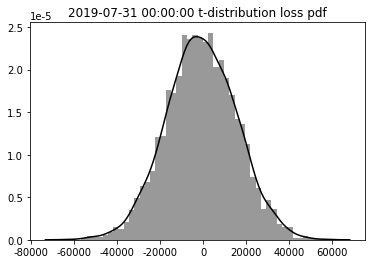

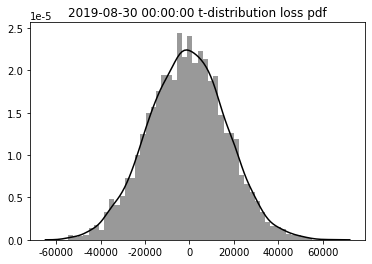

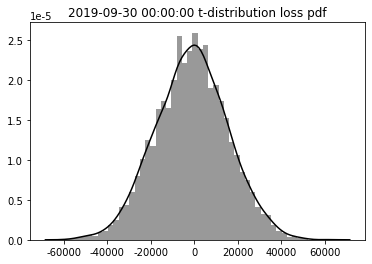

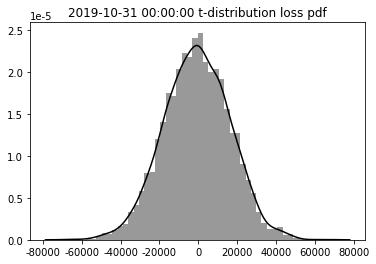

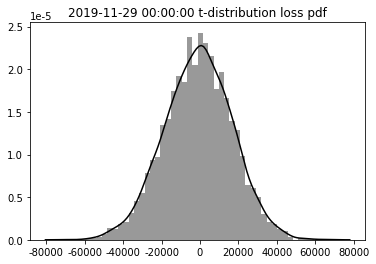

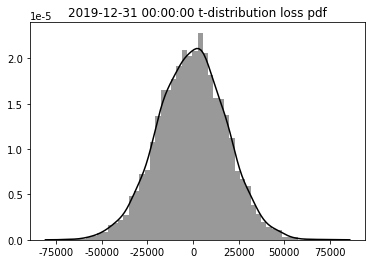

In [0]:
for i in range(len(t_loss_list)):
  pdf_function1(loss_list[i],str(date_list1[i])+' t-distribution loss pdf')
  plt.show()


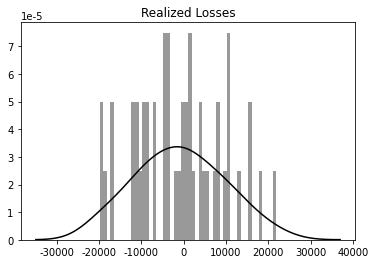

In [0]:
pdf_function1(last_four_year_loss,'Realized Losses')

In [0]:
mean_loss_list=[]
for i in range(len(loss_list)):
  a=np.mean(loss_list[i])
  mean_loss_list.append(a)
#mean_loss_list

mean_linloss_list=[]
for i in range(len(linloss_list)):
  a=np.mean(linloss_list[i])
  mean_linloss_list.append(a)
#mean_linloss_list

mean_tloss_list=[]
for i in range(len(t_loss_list)):
  a=np.mean(t_loss_list[i])
  mean_tloss_list.append(a)
#mean_tloss_list

In [0]:
last_four_year_loss

[-18932.872407351155,
 337.84750267281197,
 -4157.227257374092,
 10830.426872129552,
 -3325.8961494390387,
 -17291.827916624607,
 -8541.938251639018,
 -1165.0147086393554,
 -12216.247450947296,
 88.04996879398823,
 15418.806277690921,
 10627.013960084645,
 -3636.780932677444,
 4297.163293835241,
 1718.2090567825362,
 4687.945226932643,
 583.6375719094649,
 2450.9909252459183,
 8289.630886656465,
 -11354.11656220071,
 -6674.4747103985865,
 -3347.7751185644884,
 -16575.81195975584,
 9910.4678175,
 1423.0961845181882,
 12817.40706770122,
 -19841.57062660181,
 5710.630107068457,
 15423.599615601124,
 -1662.3832700671628,
 -9438.127408304252,
 -4097.524912631605,
 7117.493082721252,
 -19491.87143880967,
 -11644.406687865965,
 -9297.39927267097,
 -8280.995466957102,
 1071.1290942798369,
 -10085.886840635445,
 4239.472891310463,
 18518.68751233141,
 -4604.578787227161,
 21862.344606400467,
 -545.3381966042798,
 -11007.333888932364,
 10319.100594769698,
 8219.842452439247,
 -6841.119414335582]

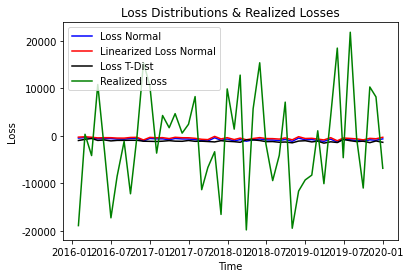

In [0]:
plt.plot(date_list1, mean_loss_list,'b', label='Loss Normal')
plt.plot(date_list1, mean_linloss_list, 'r',label='Linearized Loss Normal')
plt.plot(date_list1, mean_tloss_list,'k', label='Loss T-Dist')
plt.plot(date_list1, last_four_year_loss, 'g',label='Realized Loss')
plt.title('Loss Distributions & Realized Losses')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend()

# Now we work on 3.f

In [0]:
t,p = stats.ttest_1samp(loss_list[1],four_year_loss[1])
p

0.0

In [0]:
df_list

[3.960687775243446,
 3.8782290036018496,
 3.91271707500103,
 4.032651351992463,
 4.070129404972702,
 4.206225878603525,
 3.9754831832046884,
 4.0724887716712335,
 4.062983353702931,
 4.264181047511572,
 4.273519014087256,
 4.45973016610677,
 4.589950411066322,
 4.853563139592321,
 4.973075069749356,
 5.07538251931686,
 5.142565602384717,
 5.0661870816970795,
 5.0404894458011675,
 5.252822459325969,
 5.083780285022157,
 5.189679995178514,
 5.2317321028901596,
 5.411164442155002,
 5.6981122060670835,
 5.447052261960719,
 4.363455016299292,
 4.01041089847655,
 3.708621287914329,
 3.838785848227012,
 4.070897729313524,
 4.15941113470112,
 4.322534147270425,
 4.376072067495645,
 3.7382757741234967,
 3.6870677804866214,
 3.3237906641911836,
 3.186834480722938,
 3.234149807158527,
 3.23456044583711,
 3.3516309928171086,
 3.3172220149280527,
 3.350993453437705,
 3.3907403417213757,
 3.244914726255816,
 3.255454165958711,
 3.327130981509292,
 3.29449890071691]

In [0]:
from scipy.stats import t
def check_function(loss,typo):
  yes,no=0,0
  if typo == 'Normal':
    for i in range(48):
      u=np.mean(loss[i])
      var=np.var(loss[i])
      leftpoint = u-(1.96*var)
      rightpoint = u+(1.96*var)
      real_loss=last_four_year_loss[i]
      if real_loss >= leftpoint and real_loss <= rightpoint:
        print(str(date_list1[i])+' : Reasonable (confidence interval 95%)')
        yes+=1
      else:
        print(str(date_list1[i])+' : Unreasonable (confidence interval 95%)')
        no+=1
  if typo == 'T':
    for i in range(48):
      u=np.mean(loss[i])
      var=np.var(loss[i])
      A=t.ppf(0.975,df_list[i])
      para=A/np.sqrt(df_list[i]-1)
      leftpoint = u-(para*var)
      rightpoint = u+(para*var)
      real_loss=last_four_year_loss[i]
      if real_loss >= leftpoint and real_loss <= rightpoint:
        print(str(date_list1[i])+' : Reasonable (confidence interval 95%)')
        yes+=1
      else:
        print(str(date_list1[i])+' : Unreasonable (confidence interval 95%)')
        no+=1
  return yes,no


In [0]:
check_function(t_loss_list,'T')

2016-01-29 00:00:00 : Reasonable (confidence interval 95%)
2016-02-29 00:00:00 : Reasonable (confidence interval 95%)
2016-03-31 00:00:00 : Reasonable (confidence interval 95%)
2016-04-29 00:00:00 : Reasonable (confidence interval 95%)
2016-05-31 00:00:00 : Reasonable (confidence interval 95%)
2016-06-30 00:00:00 : Reasonable (confidence interval 95%)
2016-07-29 00:00:00 : Reasonable (confidence interval 95%)
2016-08-31 00:00:00 : Reasonable (confidence interval 95%)
2016-09-30 00:00:00 : Reasonable (confidence interval 95%)
2016-10-31 00:00:00 : Reasonable (confidence interval 95%)
2016-11-30 00:00:00 : Reasonable (confidence interval 95%)
2016-12-30 00:00:00 : Reasonable (confidence interval 95%)
2017-01-31 00:00:00 : Reasonable (confidence interval 95%)
2017-02-28 00:00:00 : Reasonable (confidence interval 95%)
2017-03-31 00:00:00 : Reasonable (confidence interval 95%)
2017-04-28 00:00:00 : Reasonable (confidence interval 95%)
2017-05-31 00:00:00 : Reasonable (confidence interval 95

(48, 0)

In [0]:
check_function(loss_list,'Normal')

2016-01-29 00:00:00 : Reasonable (confidence interval 95%)
2016-02-29 00:00:00 : Reasonable (confidence interval 95%)
2016-03-31 00:00:00 : Reasonable (confidence interval 95%)
2016-04-29 00:00:00 : Reasonable (confidence interval 95%)
2016-05-31 00:00:00 : Reasonable (confidence interval 95%)
2016-06-30 00:00:00 : Reasonable (confidence interval 95%)
2016-07-29 00:00:00 : Reasonable (confidence interval 95%)
2016-08-31 00:00:00 : Reasonable (confidence interval 95%)
2016-09-30 00:00:00 : Reasonable (confidence interval 95%)
2016-10-31 00:00:00 : Reasonable (confidence interval 95%)
2016-11-30 00:00:00 : Reasonable (confidence interval 95%)
2016-12-30 00:00:00 : Reasonable (confidence interval 95%)
2017-01-31 00:00:00 : Reasonable (confidence interval 95%)
2017-02-28 00:00:00 : Reasonable (confidence interval 95%)
2017-03-31 00:00:00 : Reasonable (confidence interval 95%)
2017-04-28 00:00:00 : Reasonable (confidence interval 95%)
2017-05-31 00:00:00 : Reasonable (confidence interval 95

(48, 0)

In [0]:
check_function(linloss_list,'Normal')

2016-01-29 00:00:00 : Reasonable (confidence interval 95%)
2016-02-29 00:00:00 : Reasonable (confidence interval 95%)
2016-03-31 00:00:00 : Reasonable (confidence interval 95%)
2016-04-29 00:00:00 : Reasonable (confidence interval 95%)
2016-05-31 00:00:00 : Reasonable (confidence interval 95%)
2016-06-30 00:00:00 : Reasonable (confidence interval 95%)
2016-07-29 00:00:00 : Reasonable (confidence interval 95%)
2016-08-31 00:00:00 : Reasonable (confidence interval 95%)
2016-09-30 00:00:00 : Reasonable (confidence interval 95%)
2016-10-31 00:00:00 : Reasonable (confidence interval 95%)
2016-11-30 00:00:00 : Reasonable (confidence interval 95%)
2016-12-30 00:00:00 : Reasonable (confidence interval 95%)
2017-01-31 00:00:00 : Reasonable (confidence interval 95%)
2017-02-28 00:00:00 : Reasonable (confidence interval 95%)
2017-03-31 00:00:00 : Reasonable (confidence interval 95%)
2017-04-28 00:00:00 : Reasonable (confidence interval 95%)
2017-05-31 00:00:00 : Reasonable (confidence interval 95

(48, 0)

# Now we work on 4.a

In [0]:
def VaR(loss,alpha):
  choose_num=int(len(loss[1])*alpha-1)
  a=loss.copy()
  VaR_list_loss=[]
  for i in range(48):
    b=a[i]
    b.sort()
    res=b[choose_num]
    VaR_list_loss.append(res)
  return VaR_list_loss 

def CVaR(loss,alpha):
  choose_num=int(len(loss[1])*alpha)
  a=loss.copy()
  CVaR_list_loss=[]
  for i in range(48):
    b=a[i]
    b.sort()
    res=np.mean(b[choose_num:])/(1-alpha)
    CVaR_list_loss.append(res)
  return CVaR_list_loss 


In [0]:
VaR_loss1=VaR(loss_list,0.95)
VaR_linloss1=VaR(linloss_list,0.95)
VaR_tloss1=VaR(t_loss_list,0.95)

VaR_loss2=VaR(loss_list,0.99)
VaR_linloss2=VaR(linloss_list,0.99)
VaR_tloss2=VaR(t_loss_list,0.99)

In [0]:
CVaR_loss1=CVaR(loss_list,0.95)
CVaR_linloss1=CVaR(linloss_list,0.95)
CVaR_tloss1=CVaR(t_loss_list,0.95)

CVaR_loss2=CVaR(loss_list,0.99)
CVaR_linloss2=CVaR(linloss_list,0.99)
CVaR_tloss2=CVaR(t_loss_list,0.99)

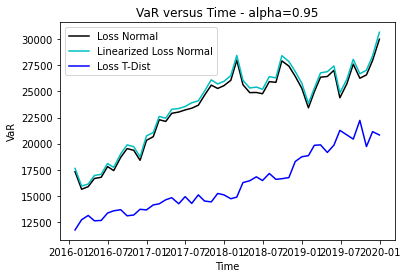

In [0]:
plt.plot(date_list1, VaR_loss1,'k', label='Loss Normal')
plt.plot(date_list1, VaR_linloss1, 'c',label='Linearized Loss Normal')
plt.plot(date_list1, VaR_tloss1,'b', label='Loss T-Dist')
plt.title('VaR versus Time - alpha=0.95')
plt.ylabel('VaR')
plt.xlabel('Time')
plt.legend()

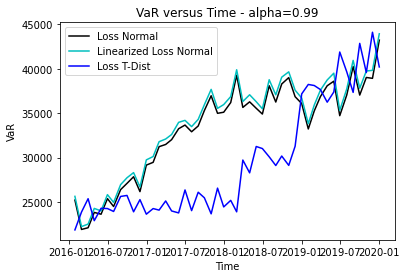

In [0]:
plt.plot(date_list1, VaR_loss2,'k', label='Loss Normal')
plt.plot(date_list1, VaR_linloss2, 'c',label='Linearized Loss Normal')
plt.plot(date_list1, VaR_tloss2,'b', label='Loss T-Dist')
plt.title('VaR versus Time - alpha=0.99')
plt.ylabel('VaR')
plt.xlabel('Time')
plt.legend()

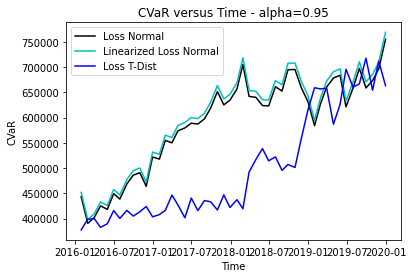

In [0]:
plt.plot(date_list1, CVaR_loss1,'k', label='Loss Normal')
plt.plot(date_list1, CVaR_linloss1, 'c',label='Linearized Loss Normal')
plt.plot(date_list1, CVaR_tloss1,'b', label='Loss T-Dist')
plt.title('CVaR versus Time - alpha=0.95')
plt.ylabel('CVaR')
plt.xlabel('Time')
plt.legend()

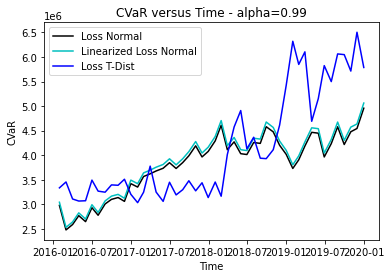

In [0]:
plt.plot(date_list1, CVaR_loss2,'k', label='Loss Normal')
plt.plot(date_list1, CVaR_linloss2, 'c',label='Linearized Loss Normal')
plt.plot(date_list1, CVaR_tloss2,'b', label='Loss T-Dist')
plt.title('CVaR versus Time - alpha=0.99')
plt.ylabel('CVaR')
plt.xlabel('Time')
plt.legend()

# Now we work on 4.b

In [0]:
VaR_loss1=VaR(loss_list,0.95)
VaR_linloss1=VaR(linloss_list,0.95)
VaR_tloss1=VaR(t_loss_list,0.95)

VaR_loss2=VaR(loss_list,0.99)
VaR_linloss2=VaR(linloss_list,0.99)
VaR_tloss2=VaR(t_loss_list,0.99)

In [0]:
def diff_function(loss):
  a_list=[]
  for i in range(48):
    a=np.abs(loss[i]-last_four_year_loss[i])
    a_list.append(a)
  return a_list

In [0]:
diff_var_loss1=diff_function(VaR_loss1)
diff_var_linloss1=diff_function(VaR_linloss1)
diff_var_tloss1=diff_function(VaR_tloss1)

diff_var_loss2=diff_function(VaR_loss2)
diff_var_linloss2=diff_function(VaR_linloss2)
diff_var_tloss2=diff_function(VaR_tloss2)

diff_cvar_loss1=diff_function(CVaR_loss1)
diff_cvar_linloss1=diff_function(CVaR_linloss1)
diff_cvar_tloss1=diff_function(CVaR_tloss1)

diff_cvar_loss2=diff_function(CVaR_loss2)
diff_cvar_linloss2=diff_function(CVaR_linloss2)
diff_cvar_tloss2=diff_function(CVaR_tloss2)

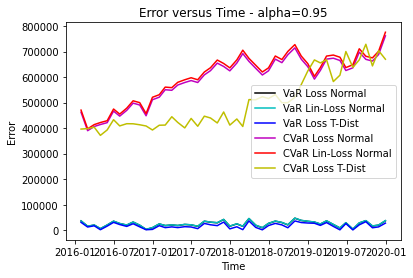

In [0]:
plt.plot(date_list1, diff_var_loss1,'k', label='VaR Loss Normal')
plt.plot(date_list1, diff_var_linloss1, 'c',label='VaR Lin-Loss Normal')
plt.plot(date_list1, diff_var_tloss1,'b', label='VaR Loss T-Dist')
plt.plot(date_list1, diff_cvar_loss1,'m', label='CVaR Loss Normal')
plt.plot(date_list1, diff_cvar_linloss1, 'r',label='CVaR Lin-Loss Normal')
plt.plot(date_list1, diff_cvar_tloss1,'y', label='CVaR Loss T-Dist')
plt.title('Error versus Time - alpha=0.95')
plt.ylabel('Error')
plt.xlabel('Time')
plt.legend()

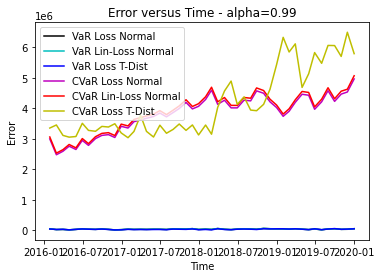

In [0]:
plt.plot(date_list1, diff_var_loss2,'k', label='VaR Loss Normal')
plt.plot(date_list1, diff_var_linloss2, 'c',label='VaR Lin-Loss Normal')
plt.plot(date_list1, diff_var_tloss2,'b', label='VaR Loss T-Dist')
plt.plot(date_list1, diff_cvar_loss2,'m', label='CVaR Loss Normal')
plt.plot(date_list1, diff_cvar_linloss2, 'r',label='CVaR Lin-Loss Normal')
plt.plot(date_list1, diff_cvar_tloss2,'y', label='CVaR Loss T-Dist')
plt.title('Error versus Time - alpha=0.99')
plt.ylabel('Error')
plt.xlabel('Time')
plt.legend()

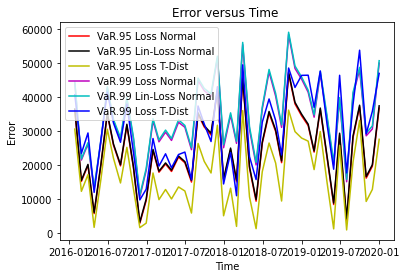

In [0]:
plt.plot(date_list1, diff_var_loss1, 'r',label='VaR.95 Loss Normal')
plt.plot(date_list1, diff_var_linloss1, 'k',label='VaR.95 Lin-Loss Normal')
plt.plot(date_list1, diff_var_tloss1,'y', label='VaR.95 Loss T-Dist')
plt.plot(date_list1, diff_var_loss2, 'm',label='VaR.99 Loss Normal')
plt.plot(date_list1, diff_var_linloss2, 'c',label='VaR.99 Lin-Loss Normal')
plt.plot(date_list1, diff_var_tloss2,'b', label='VaR.99 Loss T-Dist')
plt.title('Error versus Time ')
plt.ylabel('Error')
plt.xlabel('Time')
plt.legend()


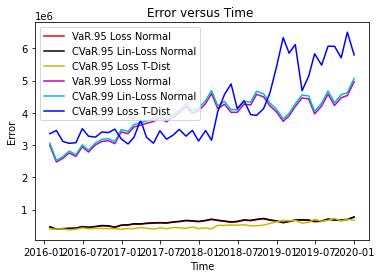

In [0]:
plt.plot(date_list1, diff_cvar_loss1, 'r',label='VaR.95 Loss Normal')
plt.plot(date_list1, diff_cvar_linloss1, 'k',label='CVaR.95 Lin-Loss Normal')
plt.plot(date_list1, diff_cvar_tloss1,'y', label='CVaR.95 Loss T-Dist')
plt.plot(date_list1, diff_cvar_loss2, 'm',label='VaR.99 Loss Normal')
plt.plot(date_list1, diff_cvar_linloss2, 'c',label='CVaR.99 Lin-Loss Normal')
plt.plot(date_list1, diff_cvar_tloss2,'b', label='CVaR.99 Loss T-Dist')
plt.title('Error versus Time ')
plt.ylabel('Error')
plt.xlabel('Time')
plt.legend()
